LOAD DATA

In [1]:
# LOAD JSONS   train_data e test_data

import json
import pandas as pd
import os

# --- Define the path to our data ---
train_file_path = 'train.jsonl'
test_file_path  = 'test.jsonl'

train_data = []
test_data  = []

# --- Load TRAIN data ---
print(f"📦 Loading data from '{train_file_path}'...")
try:
    with open(train_file_path, 'r') as f:
        for line in f:
            train_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(train_data)} battles from train.")
    
    # Show structure of first train battle
    if train_data:
        print("\n--- Structure of the first train battle: ---")
        first_battle = train_data[0]
        battle_for_display = first_battle.copy()
        battle_for_display['battle_timeline'] = first_battle.get('battle_timeline', [])[:2]
        print(json.dumps(battle_for_display, indent=4))
        if len(first_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the training file at '{train_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


# --- Load TEST data ---
print(f"\n📦 Loading data from '{test_file_path}'...")
try:
    with open(test_file_path, 'r') as f:
        for line in f:
            test_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(test_data)} battles from test.")
    
    # Optional: inspect the first test battle
    if test_data:
        print("\n--- Structure of the first test battle: ---")
        first_test_battle = test_data[0]
        test_display = first_test_battle.copy()
        test_display['battle_timeline'] = test_display.get('battle_timeline', [])[:2]
        print(json.dumps(test_display, indent=4))
        if len(first_test_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the test file at '{test_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


📦 Loading data from 'train.jsonl'...
✅ Successfully loaded 10000 battles from train.

--- Structure of the first train battle: ---
{
    "player_won": true,
    "p1_team_details": [
        {
            "name": "starmie",
            "level": 100,
            "types": [
                "psychic",
                "water"
            ],
            "base_hp": 60,
            "base_atk": 75,
            "base_def": 85,
            "base_spa": 100,
            "base_spd": 100,
            "base_spe": 115
        },
        {
            "name": "exeggutor",
            "level": 100,
            "types": [
                "grass",
                "psychic"
            ],
            "base_hp": 95,
            "base_atk": 95,
            "base_def": 85,
            "base_spa": 125,
            "base_spd": 125,
            "base_spe": 55
        },
        {
            "name": "chansey",
            "level": 100,
            "types": [
                "normal",
                "notype"
    

In [2]:
#Per vedere i dati in dataframe, divisi in 4 blocchi dove squadra==p1 e pokemon==p2
import pandas as pd

def create_dataframe(data):
    # DataFrame generale con info di base
    df_battle = pd.DataFrame([{
        "battle_id": b["battle_id"],
        "player_won": b.get("player_won", None)  # nel test non esiste
    } for b in data])

    # DataFrame con i Pokémon della squadra del giocatore (p1_team_details)
    df_squad = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "pokemon_name": p["name"],
            "level": p["level"],
            "types": p["types"],
            "base_hp": p["base_hp"],
            "base_atk": p["base_atk"],
            "base_def": p["base_def"],
            "base_spa": p["base_spa"],
            "base_spd": p["base_spd"],
            "base_spe": p["base_spe"]
        }
        for b in data
        for p in b["p1_team_details"]
    ])

    # DataFrame con dettagli del lead Pokémon dell'avversario
    df_pokemon = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "name": b["p2_lead_details"]["name"],
            "level": b["p2_lead_details"]["level"],
            "types": b["p2_lead_details"]["types"],
            "base_hp": b["p2_lead_details"]["base_hp"],
            "base_atk": b["p2_lead_details"]["base_atk"],
            "base_def": b["p2_lead_details"]["base_def"],
            "base_spa": b["p2_lead_details"]["base_spa"],
            "base_spd": b["p2_lead_details"]["base_spd"],
            "base_spe": b["p2_lead_details"]["base_spe"]
        }
        for b in data
    ])

    # DataFrame con la timeline dei turni
    df_battle_timeline = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "turn": t["turn"],
            "p1_pokemon": t["p1_pokemon_state"]["name"],
            "p1_hp": t["p1_pokemon_state"]["hp_pct"],
            "p1_status": t["p1_pokemon_state"]["status"],
            "p1_effects": t["p1_pokemon_state"]["effects"],
            "p1_boosts": t["p1_pokemon_state"]["boosts"],
            "p2_pokemon": t["p2_pokemon_state"]["name"],
            "p2_hp": t["p2_pokemon_state"]["hp_pct"],
            "p2_status": t["p2_pokemon_state"]["status"],
            "p2_effects": t["p2_pokemon_state"]["effects"],
            "p2_boosts": t["p2_pokemon_state"]["boosts"],
            "p1_move_name": t["p1_move_details"]["name"] if t["p1_move_details"] else None,
            "p1_move_type": t["p1_move_details"]["type"] if t["p1_move_details"] else None,
            "p1_move_cat": t["p1_move_details"]["category"] if t["p1_move_details"] else None,
            "p1_move_basepow": t["p1_move_details"]["base_power"] if t["p1_move_details"] else None,
            "p1_move_acc": t["p1_move_details"]["accuracy"] if t["p1_move_details"] else None,
            "p1_move_priority": t["p1_move_details"]["priority"] if t["p1_move_details"] else None,
            "p2_move_name": t["p2_move_details"]["name"] if t["p2_move_details"] else None,
            "p2_move_type": t["p2_move_details"]["type"] if t["p2_move_details"] else None,
            "p2_move_cat": t["p2_move_details"]["category"] if t["p2_move_details"] else None,
            "p2_move_basepow": t["p2_move_details"]["base_power"] if t["p2_move_details"] else None,
            "p2_move_acc": t["p2_move_details"]["accuracy"] if t["p2_move_details"] else None,
            "p2_move_priority": t["p2_move_details"]["priority"] if t["p2_move_details"] else None
        }
        for b in data
        for t in b["battle_timeline"]
    ])

    return [df_battle, df_squad, df_pokemon, df_battle_timeline]

#train_data e test_data
#battle,squad,pokemon,timeline
train_list=create_dataframe(train_data)
test_list=create_dataframe(test_data)

FUNZIONI IMPORTANTI

In [3]:
#funzione per ottenere tutti i tipi di status e effetti(UNICI)
import pandas as pd
def unique_se(lista):
    df_battle_timeline=lista[3]
    # Unione dei due campi status
    all_status = pd.concat([
        df_battle_timeline['p1_status'],
        df_battle_timeline['p2_status']
    ], ignore_index=True)
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )   
    unique_status.remove("nostatus")
    print("status unici:", unique_status)

    all_effects = []

    for col in ["p1_effects", "p2_effects"]:
        for row in df_battle_timeline[col].dropna():
            if isinstance(row, list):
                all_effects.extend(row)
            elif isinstance(row, str):
                all_effects.append(row)

    unique_effects = sorted(set(all_effects))
    unique_effects.remove("noeffect")
    print("EFFECTS unici:", unique_effects)
    return unique_status,unique_effects

#unique_status,unique_effects=unique_se(train_list)

In [4]:
#Funzione per ottenere i tipi dei pokemon(UNICI)
def unique_t(lista):
    df_pokemon=lista[2]
    df_squad=lista[1]
    unique_types = sorted(
        set(
            t
            for types_list in pd.concat([df_pokemon["types"], df_squad["types"]])
            for t in types_list
        )
    )
    return unique_types

In [5]:
#Funzione che conta le occorrenze degli status
def status_counts(df, prefix,unique):
  counts = (
      df.groupby(['battle_id', f'{prefix}_status'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )

  counts = counts[['battle_id'] + unique]

  #Aggiungiamo tutti gli status presenti nel df
  for st in unique:
    if st not in counts.columns:
        counts[st] = 0
  
  counts.columns = ['battle_id'] + [f'{prefix}_status_{c}' for c in counts.columns if c != 'battle_id']
  return counts

In [6]:
#Funzione che conta le occorrenze degli effetti
from collections import Counter
import pandas as pd

def effects_counts(df, prefix,unique):
    rows = []
    for bid, group in df.groupby('battle_id'):
        all_effects = []
        for eff in group[f'{prefix}_effects'].dropna():
            if isinstance(eff, list):
                all_effects.extend(eff)
            elif isinstance(eff, str):
                all_effects.append(eff)
        # Conta le occorrenze di ogni effetto
        counts = Counter(all_effects)
        # Crea un dizionario con battle_id + contatori
        rows.append({'battle_id': bid, **counts})

    # 🔹 Converte in DataFrame
    eff_df = pd.DataFrame(rows).fillna(0)

    # 🔹 Aggiungi eventuali colonne mancanti per effetti non osservati
    for eff in unique:
        if eff not in eff_df.columns:
            eff_df[eff] = 0

    # 🔹 Riordina le colonne secondo l’ordine di unique_effects
    eff_df = eff_df[['battle_id'] + unique]

    # 🔹 Rinomina con prefisso (p1_effect_xxx, p2_effect_xxx, ...)
    eff_df.columns = ['battle_id'] + [f'{prefix}_effect_{c}' for c in unique]

    return eff_df

In [7]:
#Funziojne per MOSSE: TIPO E CATEGORIA (TO-DOO)
def move_type_counts(df, prefix):
  type_counts = (
      df.groupby(['battle_id', f'{prefix}_move_type'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  type_counts.columns = ['battle_id'] + [f'{prefix}_movetype_{c}' for c in type_counts.columns if c != 'battle_id']

  cat_counts = (
      df.groupby(['battle_id', f'{prefix}_move_cat'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  cat_counts.columns = ['battle_id'] + [f'{prefix}_movecat_{c}' for c in cat_counts.columns if c != 'battle_id']

  return type_counts.merge(cat_counts, on='battle_id', how='outer').fillna(0)


In [8]:
import pandas as pd
def boosts_sum(df):
    """
    Somma i valori di atk, def, spa, spd, spe per ciascun battle_id e giocatore (p1 e p2).
    """
    rows = []

    for bid, group in df.groupby('battle_id'):
        # inizializza accumulatori
        p1_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}
        p2_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}

        for _, row in group.iterrows():
            # somma i valori del dizionario se esistono
            if isinstance(row.get('p1_boosts'), dict):
                for k in p1_tot.keys():
                    p1_tot[k] += row['p1_boosts'].get(k, 0)
            if isinstance(row.get('p2_boosts'), dict):
                for k in p2_tot.keys():
                    p2_tot[k] += row['p2_boosts'].get(k, 0)

        # crea un'unica riga per la battaglia
        rows.append({
            'battle_id': bid,
            **{f'p1_boost_{k}': v for k, v in p1_tot.items()},
            **{f'p2_boost_{k}': v for k, v in p2_tot.items()}
        })

    return pd.DataFrame(rows)


In [9]:
import pandas as pd
#VITA RIMASTA AI POKEMON CHE NON SONO MORTI DURANTE I PRIMI 30 ROUND
def extract_hp_sum(df):

    def last_hp_sum(df, pokemon_col, hp_col):
        # Prende l'ultimo HP registrato per ciascun Pokémon in ciascuna battaglia
        last_hp = (
            df.dropna(subset=[pokemon_col])
              .sort_values(['battle_id', pokemon_col, 'turn'])
              .groupby(['battle_id', pokemon_col], as_index=False)
              .last()[['battle_id', hp_col]]
        )
        # Somma HP rimanenti per battaglia
        return last_hp.groupby('battle_id')[hp_col].sum().rename(f"somma_{pokemon_col[:2]}")

    somma_p1 = last_hp_sum(df, 'p1_pokemon', 'p1_hp')
    somma_p2 = last_hp_sum(df, 'p2_pokemon', 'p2_hp')

    result = pd.concat([somma_p1, somma_p2], axis=1).reset_index().fillna(0)
    
    #NUMERO DI POKEMON
    n_pokemon = (
        df.groupby('battle_id')
        .agg({
            'p1_pokemon': lambda x: len(set(x.dropna())),
            'p2_pokemon': lambda x: len(set(x.dropna()))
        })
        .rename(columns={
            'p1_pokemon': 'p1_pokemon_used',
            'p2_pokemon': 'p2_pokemon_used'
        })
        .reset_index()
    )

    result = result.merge(n_pokemon, on='battle_id', how='left')
    
    # Aggiunge la vita dei Pokémon non usati 
    result['somma_p1'] = result['somma_p1'] + (6 - result['p1_pokemon_used'])
    result['somma_p2'] = result['somma_p2'] + (6 - result['p2_pokemon_used'])
    result['somma_diff_hp']=result['somma_p1']-result['somma_p2']

    return result[['battle_id', 'somma_diff_hp']]


SCALER

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_features(df: pd.DataFrame, exclude_cols: list = None):
    """
    Applica StandardScaler alle colonne numeriche di un DataFrame,
    escludendo quelle in exclude_cols (ad es. 'battle_id', 'player_won').

    Args:
        df (pd.DataFrame): il DataFrame da scalare
        exclude_cols (list, optional): colonne da escludere dallo scaling

    Returns:
        df_scaled (pd.DataFrame): DataFrame con feature scalate
        scaler (StandardScaler): oggetto scaler già fit
    """
    if exclude_cols is None:
        exclude_cols = []

    # Seleziona le colonne da scalare
    feature_cols = [col for col in df.columns if col not in exclude_cols]

    # Crea una copia per non modificare l'originale
    df_scaled = df.copy()

    # Inizializza lo scaler e applica fit_transform
    scaler = StandardScaler()
    df_scaled[feature_cols] = scaler.fit_transform(df_scaled[feature_cols])

    return df_scaled, scaler

FEATURE EXTRACTION--statica

Oss: modello con differenze ottiene acc=0.56 a differenza del baseline( quello in mystart con i valori base_hp ed ecc sia per p1 che p2) che ottiene 0.51

In [11]:
#Creazione del modello da allenare(Statico, prima del match)
#differenze tra squadra e primo pokemon del secondo 
import pandas as pd

def extract_feature_diff(lista,isTrain):
    df_battle = lista[0]
    df_pokemon = lista[2]
    df_squad = lista[1]

    unique_types = unique_t(lista)  # funzione che restituisce tutti i tipi unici

    # --- PLAYER 1 ---
    df_squad["types_clean"] = df_squad["types"].apply(lambda x: [t for t in x if t != "notype"])
    agg_squad1 = df_squad.groupby("battle_id").agg({
        "base_hp": "mean",
        "base_atk": "mean",
        "base_def": "mean",
        "base_spa": "mean",
        "base_spd": "mean",
        "base_spe": "mean",
        "level": "mean",
        "types_clean": lambda lst: [t for sub in lst for t in sub]
    }).reset_index()

    for t in unique_types:
        agg_squad1[t] = agg_squad1["types_clean"].apply(lambda lst: lst.count(t))

    agg_squad1 = (
        agg_squad1
        .drop(columns=["types_clean"])
        .add_prefix("p1_")
        .rename(columns={"p1_battle_id": "battle_id"})
    )

    # --- PLAYER 2 ---
    df_squad2 = df_pokemon.copy()
    df_squad2["types_clean"] = df_squad2["types"].apply(lambda x: [t for t in x if t != "notype"])
    for t in unique_types:
        df_squad2[t] = df_squad2["types_clean"].apply(lambda lst: lst.count(t))

    df_squad2 = df_squad2.drop(columns=["types_clean", "types", "name"], errors="ignore")
    agg_squad2 = df_squad2.add_prefix("p2_").rename(columns={"p2_battle_id": "battle_id"})

    # --- UNIONE FINALE ---
    agg_full = agg_squad1.merge(agg_squad2, on="battle_id", how="inner")
    agg_full = agg_full.merge(df_battle[["battle_id", "player_won"]], on="battle_id", how="left")
    
    #controllo per evitare errori durante test
    # Se il dataset è di train, converti la colonna; se è di test, lasciala così
    if isTrain:
        agg_full["player_won"] = agg_full["player_won"].astype(int)
    else:
        agg_full["player_won"] = None
    # --- DIFFERENZE TRA P1 E P2 ---
    base_stats = ["base_hp", "base_atk", "base_def", "base_spa", "base_spd", "base_spe", "level"]
    for stat in base_stats:
        col_p1 = f"p1_{stat}"
        col_p2 = f"p2_{stat}"
        diff_col = f"diff_{stat}"
        agg_full[diff_col] = agg_full[col_p1] - agg_full[col_p2]

    # --- X RIMUOVERE LE FEATURE ORIGINALI, sarebbero ridondanti 
    cols_to_drop = [f"p1_{s}" for s in base_stats] + [f"p2_{s}" for s in base_stats]
    agg_full = agg_full.drop(columns=cols_to_drop)
    #print(agg_full)
    return agg_full.fillna(0)

#extract_feature_diff(train_list)


In [12]:
#Create pokedex
def create_pokedex(lista_df):
    df_list=lista_df
    df_squad=df_list[1]
    df_pokemon=df_list[2]
    df_all_pokemon = pd.concat([df_squad, df_pokemon], ignore_index=True)
    df_all_pokemon["types"] = df_all_pokemon["types"].apply(lambda x: tuple(x) if isinstance(x, list) else x)

    # Mantieni solo Pokémon unici per nome (se stessi nomi → stessi tipi e stats)
    df_all_pokemon = (
        df_all_pokemon.drop_duplicates(subset=["name", "types"])
        .reset_index(drop=True)
    )
    #print(f"Pokedex creato con {len(df_all_pokemon)} Pokémon unici ")
    return df_all_pokemon

In [13]:
#Codice che tramite battle timeline prende il tipo per ogni pokemon della seconda squadra
def tipiSquadra2(df,lista,lista_df):
    df_pokedex=create_pokedex(lista_df)[["name", "types"]]
    df_battle_timeline=lista_df[3]
    
    for tipo in lista:
        col = f"p2_{tipo}"
        if col not in df.columns:
            df[col] = 0.0
    
    # --- Itera su ogni battaglia ---
    for battle_id in df["battle_id"].unique():
        #Ottieni la lista di Pokémon P2 in quella battaglia
        p2_pokemon_list = (
            df_battle_timeline.loc[df_battle_timeline["battle_id"] == battle_id, "p2_pokemon"]
            .dropna()
            .unique()
            .tolist()
        )
        # Filtra il pokedex per quei Pokémon
        df_p2_pokemons = df_pokedex[df_pokedex["name"].isin(p2_pokemon_list)].copy()
        types_list = [t for types in df_p2_pokemons["types"] for t in types if t != "notype"]
        # Aggiorna la riga corrispondente nel dataframe df
        df.loc[df["battle_id"] == battle_id, "p2team_size"]=max(len(p2_pokemon_list), 1)

        for elem in types_list:
            col = f"p2_{elem}"
            #if col in df.columns:  # aggiorna solo se la colonna esiste
            df.loc[df["battle_id"] == battle_id, col] +=1#(1/p2team_size)
    return df
        

In [14]:
def tipiSquadra22(df, unique_types, lista_df):
    df_pokedex = create_pokedex(lista_df)[["name", "types"]]
    df_battle_timeline = lista_df[3]

    # Ottieni tutti i Pokémon usati da p2 in ogni battle_id
    p2_battles = (
        df_battle_timeline.groupby("battle_id")["p2_pokemon"]
        .apply(lambda x: list(set(x.dropna())))
        .reset_index()
    )

    # Esplodi per ottenere una riga per ogni (battle_id, pokemon)
    p2_battles = p2_battles.explode("p2_pokemon").dropna(subset=["p2_pokemon"])

    # Merge con pokedex per ottenere i tipi di ciascun Pokémon
    merged = p2_battles.merge(df_pokedex, left_on="p2_pokemon", right_on="name", how="left")

    # Rimuovi i Pokémon non trovati
    merged = merged.dropna(subset=["types"])

    # Esplodi i tipi per conteggiare quanti tipi appaiono per battle_id
    exploded = (
        merged.explode("types")
        .groupby(["battle_id", "types"])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )

    # Aggiungi colonne mancanti per tipi non presenti
    for tipo in unique_types:
        if tipo not in exploded.columns:
            exploded[tipo] = 0

    # Rinominazione colonne
    exploded = exploded.add_prefix("p2_").rename(columns={"p2_battle_id": "battle_id"})

    # Merge finale
    df = df.merge(exploded, on="battle_id", how="left").fillna(0)

    return df


In [15]:
#Creazione del modello da allenare(Statico, prima del match)
#differenze tra squadra e primo pokemon del secondo 
import pandas as pd

def extract_feature_diff_tottipi(lista,isTrain):
    df_battle = lista[0]
    df_pokemon = lista[2]
    df_squad = lista[1]

    unique_types = unique_t(lista)  # funzione che restituisce tutti i tipi unici

    # --- PLAYER 1 ---
    df_squad["types_clean"] = df_squad["types"].apply(lambda x: [t for t in x if t != "notype"])
    agg_squad1 = df_squad.groupby("battle_id").agg({
        "base_hp": "mean",
        "base_atk": "mean",
        "base_def": "mean",
        "base_spa": "mean",
        "base_spd": "mean",
        "base_spe": "mean",
        "level": "mean",
        "types_clean": lambda lst: [t for sub in lst for t in sub]
    }).reset_index()
    #####normalizzare type size
    #p1team_size = (
    #    df_squad.groupby("battle_id")["pokemon_name"]
    #    .nunique()
    #    .reset_index()
    #    .rename(columns={"pokemon_name": "p1_team_size"})
    #)
    #agg_squad1 = agg_squad1.merge(p1team_size, on="battle_id", how="left")
    ##############
    for t in unique_types:
        agg_squad1[t] = agg_squad1["types_clean"].apply(lambda lst: lst.count(t))#/ agg_squad1["p1_team_size"]
    #agg_squad1 = agg_squad1.drop(columns=["p1_team_size"])

    agg_squad1 = (
        agg_squad1
        .drop(columns=["types_clean"])
        .add_prefix("p1_")
        .rename(columns={"p1_battle_id": "battle_id"})
    )

    # --- PLAYER 2 --
    df_squad2 = df_pokemon.copy()
    df_squad2["types_clean"] = df_squad2["types"].apply(lambda x: [t for t in x if t != "notype"])
    for t in unique_types:
        df_squad2[t] = 0.0#df_squad2["types_clean"].apply(lambda lst: lst.count(t))

    df_squad2 = df_squad2.drop(columns=["types_clean", "types", "name"], errors="ignore")
    agg_squad2 = df_squad2.add_prefix("p2_").rename(columns={"p2_battle_id": "battle_id"})

    # --- UNIONE FINALE ---
    agg_full = agg_squad1.merge(agg_squad2, on="battle_id", how="inner")
    agg_full = agg_full.merge(df_battle[["battle_id", "player_won"]], on="battle_id", how="left")
    
    #controllo per evitare errori durante test
    # Se il dataset è di train, converti la colonna; se è di test, lasciala così
    if isTrain:
        agg_full["player_won"] = agg_full["player_won"].astype(int)
    else:
        agg_full["player_won"] = None
    # --- DIFFERENZE TRA P1 E P2 ---
    base_stats = ["base_hp", "base_atk", "base_def", "base_spa", "base_spd", "base_spe", "level"]
    for stat in base_stats:
        col_p1 = f"p1_{stat}"
        col_p2 = f"p2_{stat}"
        diff_col = f"diff_{stat}"
        agg_full[diff_col] = agg_full[col_p1] - agg_full[col_p2]

    # --- X RIMUOVERE LE FEATURE ORIGINALI, sarebbero ridondanti 
    cols_to_drop = [f"p1_{s}" for s in base_stats] + [f"p2_{s}" for s in base_stats]
    agg_full = agg_full.drop(columns=cols_to_drop)
    agg_full=tipiSquadra2(agg_full,unique_types,lista) 
    return agg_full.fillna(0)

#extract_feature_diff(train_list)


FEATURE EXTRACTION -- STATICA+DINAMICA

In [16]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all(lista,isTrain):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff(lista,isTrain)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS 
    p1_status = status_counts(df_battle_timeline, 'p1',unique_status)
    p2_status = status_counts(df_battle_timeline, 'p2',unique_status)

    #EFFETTI
    p1_effects = effects_counts(df_battle_timeline, 'p1',unique_effects)
    p2_effects = effects_counts(df_battle_timeline, 'p2',unique_effects)

    #(TO-DO) TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p1_status,
        p2_status,
        p1_effects,
        p2_effects,
        df_boosts,
        p1_moves, 
        p2_moves
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features
        .merge(dynamic_full, on='battle_id', how='left')
    )
    print(train_df.columns)
    return train_df.fillna(0)

TRAINING DEL MODELLO -- statica

In [17]:
#CROSS-VALIDATION( K-FOLD )
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

train_df=extract_feature_diff(train_list,True)

#colonne da non scalare
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
            'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
       'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
       'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']
exclude=['battle_id','player_won']+type_cols

features = [col for col in train_df.columns if col not in exclude]

#Crea il ColumnTransformer che applichera lo scaler
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), features),
        ('pass_types', 'passthrough', type_cols)
    ],
    remainder='drop'
)

#Pipeline per il modello, applica lo scaler dentro ogni fold
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

#Cross validation
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# K-Fold stratificato
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for metric in ['accuracy', 'precision', 'recall', 'f1','roc_auc']:
    s = cross_val_score(pipe, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize():<10}: mean={s.mean():.3f} ± {s.std():.3f}")

y_pred = cross_val_predict(pipe, X, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits=3))

Accuracy  : mean=0.562 ± 0.015
Precision : mean=0.561 ± 0.014
Recall    : mean=0.565 ± 0.030
F1        : mean=0.563 ± 0.020
Roc_auc   : mean=0.593 ± 0.013
[[2795 2205]
 [2176 2824]]
              precision    recall  f1-score   support

           0      0.562     0.559     0.561      5000
           1      0.562     0.565     0.563      5000

    accuracy                          0.562     10000
   macro avg      0.562     0.562     0.562     10000
weighted avg      0.562     0.562     0.562     10000



TRAINING DEL MODELLO -- statica+dinamica

Accuracy  : mean=0.833 ± 0.010
Precision : mean=0.836 ± 0.013
Recall    : mean=0.830 ± 0.019
F1        : mean=0.833 ± 0.011
Roc_auc   : mean=0.902 ± 0.011

In [18]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_df=extract_all(train_list,True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']
#colonne da non scalare
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=[ 'p1_status_par', 'p1_status_slp', 'p1_status_fnt', 'p1_status_frz',
       'p1_status_tox', 'p1_status_psn', 'p1_status_brn', 'p2_status_par',
       'p2_status_slp', 'p2_status_fnt', 'p2_status_frz', 'p2_status_tox',
       'p2_status_psn', 'p2_status_brn']

effect_cols=['p1_effect_clamp',
       'p1_effect_confusion', 'p1_effect_firespin', 'p1_effect_reflect',
       'p1_effect_substitute', 'p1_effect_typechange', 'p1_effect_wrap',
       'p2_effect_clamp', 'p2_effect_confusion', 'p2_effect_firespin',
       'p2_effect_reflect', 'p2_effect_substitute', 'p2_effect_typechange',
       'p2_effect_wrap']

exclude=['battle_id','player_won']#+type_cols+status_cols+effect_cols

features = [col for col in train_df.columns if col not in exclude]
#debug 
print(features)


preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  type_cols + status_cols + effect_cols)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for metric in ['accuracy', 'precision', 'recall', 'f1','roc_auc']:
    s = cross_val_score(pipe, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize():<10}: mean={s.mean():.3f} ± {s.std():.3f}")

y_pred = cross_val_predict(pipe, X, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits=3))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal',
       ...
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER', 'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL',
       'p2_movecat_STATUS'],
      dtype='object', length=111)
['p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying', 'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water', 'diff_base_hp', 'diff_base_atk', 'diff_base_def', 'diff_base

In [19]:
#Analisi feauture per modello dinamico 
from sklearn.inspection import permutation_importance

pipe.fit(X, y)
r = permutation_importance(pipe, X, y, n_repeats=5, random_state=42)
sorted(zip(r.importances_mean, X.columns), reverse=True)[:10]

[(np.float64(0.26814000000000004), 'somma_diff_hp'),
 (np.float64(0.009680000000000022), 'p1_status_slp'),
 (np.float64(0.009560000000000058), 'p1_ghost'),
 (np.float64(0.006260000000000021), 'p2_movecat_STATUS'),
 (np.float64(0.005640000000000045), 'p2_movecat_SPECIAL'),
 (np.float64(0.0046200000000000685), 'p1_poison'),
 (np.float64(0.0046000000000000485), 'hp_diff_mean'),
 (np.float64(0.004100000000000037), 'p2_movetype_FIGHTING'),
 (np.float64(0.0033000000000000364), 'p1_status_par'),
 (np.float64(0.0031800000000000495), 'p1_ice')]

In [20]:
print(features)


['p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying', 'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water', 'diff_base_hp', 'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp', 'p1_status_par', 'p1_status_slp', 'p1_status_fnt', 'p1_status_frz', 'p1_status_tox', 'p1_status_psn', 'p1_status_brn', 'p2_status_par', 'p2_status_slp', 'p2_status_fnt', 'p2_status_frz', 'p2_status_tox', 'p2_status_psn', 'p2_status_brn', 'p1_effect_clamp', 'p1_effect_confusion', 'p1_effect_firespin', 'p1_effect_reflect', 'p1_effect_substitute', 'p1_effect_typechange', 'p1_effect_wrap', 'p2_effect_clamp', 'p2_effect_confusion', 'p2_effect_firespin', 

AGGIUNTE AL MODELLO STATICO+DINAMICO PRECEDENTE 

FUNZINI PER AGGIUNGERE E MODIFICARE LE FEATURES BASE

In [21]:
def ragg_status(dff,unique):
    p1_status = status_counts(dff, 'p1',unique)
    p2_status = status_counts(dff, 'p2',unique)
    df = p1_status.merge(p2_status, on='battle_id', how='left').fillna(0)
    ###Codice per evitare problemi con lo split manuale 
    expected_status = ['par', 'slp', 'frz', 'brn', 'tox', 'psn', 'fnt']
    for s in expected_status:
        for p in ['p1', 'p2']:
            col = f"{p}_status_{s}"
            if col not in df.columns:
                df[col] = 0
    ####

    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    # STUNNED: par, slp, frz
    df["p1_status_stunned"] = df["p1_status_par"] + df["p1_status_slp"] + df["p1_status_frz"]
    df["p2_status_stunned"] = df["p2_status_par"] + df["p2_status_slp"] + df["p2_status_frz"]

    # POISONED: tox, psn
    df["p1_status_poisoned"] = df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_poisoned"] = df["p2_status_tox"] + df["p2_status_psn"]

    # DMG_RESIDUO: brn + (tox, psn)
    df["p1_status_dmgresiduo"] = df["p1_status_brn"] + df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_dmgresiduo"] = df["p2_status_brn"] + df["p2_status_tox"] + df["p2_status_psn"]

    # --- Differenze p1 - p2 ---
    df["diff_status_stunned"] = df["p1_status_stunned"] - df["p2_status_stunned"]
    df["diff_status_poisoned"] = df["p1_status_poisoned"] - df["p2_status_poisoned"]
    df["diff_status_dmgresiduo"] = df["p1_status_dmgresiduo"] - df["p2_status_dmgresiduo"]

    #survival rate
    df["p1_survival_rate"] = 1 - (df["p1_status_fnt"] / 6)
    df["p2_survival_rate"] = 1 - (df["p2_status_fnt"] / 6)
    df["diff_survival_rate"] = df["p1_survival_rate"] - df["p2_survival_rate"]
    
    return df[["battle_id","diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]].fillna(0)#"diff_status_poisoned" é identico a dmgresiduo

In [22]:
def ragg_effects(dff,unique):
    p1_effects = effects_counts(dff, 'p1',unique)
    p2_effects = effects_counts(dff, 'p2',unique)
    df = p1_effects.merge(p2_effects, on='battle_id', how='left').fillna(0)
    
    ###Codice per evitare problemi con lo split manuale 
    expected_effects = [
        "clamp", "confusion", "disable", "firespin",
        "reflect", "substitute", "typechange", "wrap"
    ]

    # --- Crea tutte le colonne mancanti con 0 ---
    for eff in expected_effects:
        for p in ["p1", "p2"]:
            col = f"{p}_effect_{eff}"
            if col not in df.columns:
                df[col] = 0
    ####
    
    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    df["p1_effect_trap"] = df[["p1_effect_clamp", "p1_effect_firespin", "p1_effect_wrap"]].sum(axis=1)
    df["p1_effect_buff"] = df[["p1_effect_reflect", "p1_effect_substitute"]].sum(axis=1)
    df["p1_effect_confuse"] = df["p1_effect_confusion"]
    df["p1_effect_transform"] = df["p1_effect_typechange"]

    df["p2_effect_trap"] = df[["p2_effect_clamp", "p2_effect_firespin", "p2_effect_wrap"]].sum(axis=1)
    df["p2_effect_buff"] = df[["p2_effect_reflect", "p2_effect_substitute"]].sum(axis=1)
    df["p2_effect_confuse"] = df["p2_effect_confusion"]
    df["p2_effect_transform"] = df["p2_effect_typechange"]

    #differenze 
    df["diff_effect_trap"] = df["p1_effect_trap"] - df["p2_effect_trap"]
    df["diff_effect_buff"] = df["p1_effect_buff"] - df["p2_effect_buff"]
    df["diff_effect_confuse"] = df["p1_effect_confuse"] - df["p2_effect_confuse"]

    return df[["battle_id","diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]].fillna(0)

In [23]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all(lista, is_train):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff(lista, is_train)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS raggruppamento 
    p_status = ragg_status(df_battle_timeline,unique_status) 

    #EFFETTI raggruppamento
    p_effects = ragg_effects(df_battle_timeline,unique_effects)    

    #(TO-DO) TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p_status,
        p_effects,
        df_boosts,
        p1_moves, 
        p2_moves
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features
        .merge(dynamic_full, on='battle_id', how='left')
    )

    #feature di interazione
    train_df["somma_diff_hp"] = (
        train_df["somma_diff_hp"] - train_df["somma_diff_hp"].mean()
    ) / train_df["somma_diff_hp"].std()
    print(train_df.columns)
    return train_df.fillna(0)

In [24]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_df=extract_all(train_list,True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']
#per chiarezza divisione delle features
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp'] 

#features da non scalare: contatori
temp=type_cols+status_cols+effect_cols+move_type_cols+move_cat_cols
exclude=['battle_id','player_won']+temp

features = [col for col in train_df.columns if col not in exclude]
#debug 
print(features)


preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === definisci CV stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]  # per ROC

# === metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {roc:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

In [25]:
print(features)

['diff_base_hp', 'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa', 'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def', 'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe']


In [26]:
#Analisi feauture per modello dinamico 
from sklearn.inspection import permutation_importance

pipe.fit(X, y)
r = permutation_importance(pipe, X, y, n_repeats=5, random_state=42)
sorted(zip(r.importances_mean, X.columns), reverse=True)

[(np.float64(0.28882), 'somma_diff_hp'),
 (np.float64(0.012120000000000042), 'p2_movecat_SPECIAL'),
 (np.float64(0.01154000000000006), 'diff_status_stunned'),
 (np.float64(0.01122000000000003), 'p1_ghost'),
 (np.float64(0.009380000000000032), 'p2_movecat_STATUS'),
 (np.float64(0.007740000000000036), 'p2_movetype_FIGHTING'),
 (np.float64(0.005240000000000022), 'p1_movetype_FIGHTING'),
 (np.float64(0.005100000000000038), 'hp_diff_mean'),
 (np.float64(0.004780000000000051), 'p1_poison'),
 (np.float64(0.00470000000000006), 'p2_movetype_NORMAL'),
 (np.float64(0.00418000000000005), 'p1_ice'),
 (np.float64(0.0036200000000000455), 'diff_status_poisoned'),
 (np.float64(0.0033800000000000275), 'p1_movetype_NORMAL'),
 (np.float64(0.0032600000000000185), 'diff_base_def'),
 (np.float64(0.0028400000000000205), 'p1_movetype_ICE'),
 (np.float64(0.0026200000000000446), 'diff_status_dmgresiduo'),
 (np.float64(0.0022600000000000176), 'p2_movetype_GROUND'),
 (np.float64(0.0021800000000000265), 'p1_movetyp

In [27]:
#analisi multicollinearità e importanza
from sklearn.inspection import permutation_importance
perm = permutation_importance(pipe, X, y, scoring='roc_auc')
print(perm)

{'importances_mean': array([ 5.3112000e-05,  5.6632000e-05,  2.3080000e-05,  1.1390320e-03,
        1.0001120e-02,  3.2718400e-04,  1.2930400e-04,  2.3305360e-03,
        6.5824000e-05,  0.0000000e+00,  4.5144480e-03,  1.3040720e-03,
        1.2930400e-04,  4.4501600e-04,  1.2800000e-06,  9.4704000e-05,
        4.7120000e-06,  1.0034400e-04,  3.1840000e-06,  1.7315200e-04,
        1.1984000e-05,  4.8656000e-05,  2.8106400e-04,  0.0000000e+00,
        4.4144000e-05,  6.7023200e-04,  1.1984000e-05,  7.2044800e-04,
       -6.3040000e-06,  9.0860800e-04,  1.5330320e-03,  8.3200000e-07,
        8.3200000e-07,  1.2612000e-04,  3.0032000e-05,  3.5512480e-03,
        5.2675200e-04,  9.6472000e-05,  3.2998056e-01,  8.9648560e-03,
        2.6247840e-03,  2.1115840e-03,  1.0776000e-04,  3.6160000e-06,
        1.5019600e-03,  4.6288000e-05,  4.6288000e-05,  4.4428800e-04,
        7.5680000e-06,  4.4000000e-05,  5.2384000e-05,  1.0835200e-04,
        5.5040000e-06,  0.0000000e+00, -1.6000000e-07, -

MODELLO DIFFERENTE

STAMPA SUBMISSION DEL MODELLO 8373

In [28]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list,True)
test_df = extract_all(test_list,False)  # <-- Assicurati di avere anche il test_list definito

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_vecchio.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [29]:
#####################  Train new model-dynamics (GRID SEARCH) ##########################
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === 1️⃣ Estrai i dati ===
train_df = extract_all(train_list, True)
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]
print("Features da scalare:", len(features))

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === 3️⃣ Pipeline ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === 4️⃣ Definizione della griglia di ricerca ===
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'lbfgs'],  # liblinear supporta l1, lbfgs no
    'model__class_weight': [None, 'balanced']
}

# === 5️⃣ Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === 6️⃣ Grid Search ===
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=True, 
    refit=True
)

print("🚀 Eseguo Grid Search...")
grid_search.fit(X, y)

# === 7️⃣ Risultati ===
print("\n✅ MIGLIORI PARAMETRI TROVATI:")
print(grid_search.best_params_)

print(f"\n🏆 MIGLIORE ACCURACY CV: {grid_search.best_score_:.4f}")

# === 8️⃣ Valutazione del modello migliore ===
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba')[:, 1]

print("\n=== RISULTATI FINALI (modello ottimizzato) ===")
print(f"Accuracy : {accuracy_score(y, y_pred):.4f}")
print(f"Precision: {precision_score(y, y_pred):.4f}")
print(f"Recall   : {recall_score(y, y_pred):.4f}")
print(f"F1-score : {f1_score(y, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y, y_prob):.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
140 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_esti


✅ MIGLIORI PARAMETRI TROVATI:
{'model__C': 0.5, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

🏆 MIGLIORE ACCURACY CV: 0.8345

=== RISULTATI FINALI (modello ottimizzato) ===
Accuracy : 0.8345
Precision: 0.8358
Recall   : 0.8326
F1-score : 0.8342
ROC AUC  : 0.9014

Confusion Matrix:
 [[4182  818]
 [ 837 4163]]

Classification Report:
               precision    recall  f1-score   support

           0      0.833     0.836     0.835      5000
           1      0.836     0.833     0.834      5000

    accuracy                          0.835     10000
   macro avg      0.835     0.835     0.834     10000
weighted avg      0.835     0.835     0.834     10000



MODELLO CHE OTTIENE 0.8380

In [30]:
#####################  Train new model-dynamics (robusto con pulizia) ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia: rimuovo le colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n ",train_df.columns)
# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico dei gruppi di feature ===
all_cols = X.columns.tolist()

type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        max_iter=5000,
        random_state=42,
        C=0.5,
        penalty="l1",
        solver="liblinear"
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold)...")
y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_cc.csv", index=False)

print("\n✅ File 'submission_cc.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [31]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list,True)
test_df = extract_all(test_list,False)  # <-- Assicurati di avere anche il test_list definito

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']
print("Controllo finale:\n ",train_df.columns)
# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass',  'p1_ice',"p1_ground" ,
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', "p2_ground",'p2_grass',  'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',"p2_boost_spa", "p2_boost_spd", 
        'p2_boost_spe']

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', "diff_base_spd", 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42,
        C=0.5,  
        penalty='l1',
        solver='liblinear'
        ))#C=0.7, penalty='l2'
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_cc.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

Controllo su codice 8380


=== Top 50 feature più influenti ===
scale__somma_diff_hp                  2.008457
pass_types__p1_ghost                  0.875501
pass_types__p1_poison                 0.550144
pass_types__p2_normal                 0.415927
pass_types__p2_movetype_FIRE          0.365504
pass_types__p1_movetype_FIRE          0.305477
scale__hp_diff_mean                   0.296287
pass_types__p1_ice                    0.291955
pass_types__p1_flying                 0.260563
pass_types__p2_flying                 0.250346
pass_types__p2_water                  0.232007
pass_types__p1_grass                  0.178337
pass_types__p1_psychic                0.170157
pass_types__p1_dragon                 0.165963
pass_types__p2_psychic                0.164503
pass_types__p1_ground                 0.135798
pass_types__diff_status_poisoned      0.126072
pass_types__diff_status_dmgresiduo    0.120828
scale__diff_base_def                  0.114225
pass_types__p2_movecat_STATUS         0.113028
pass_types__p1_water  

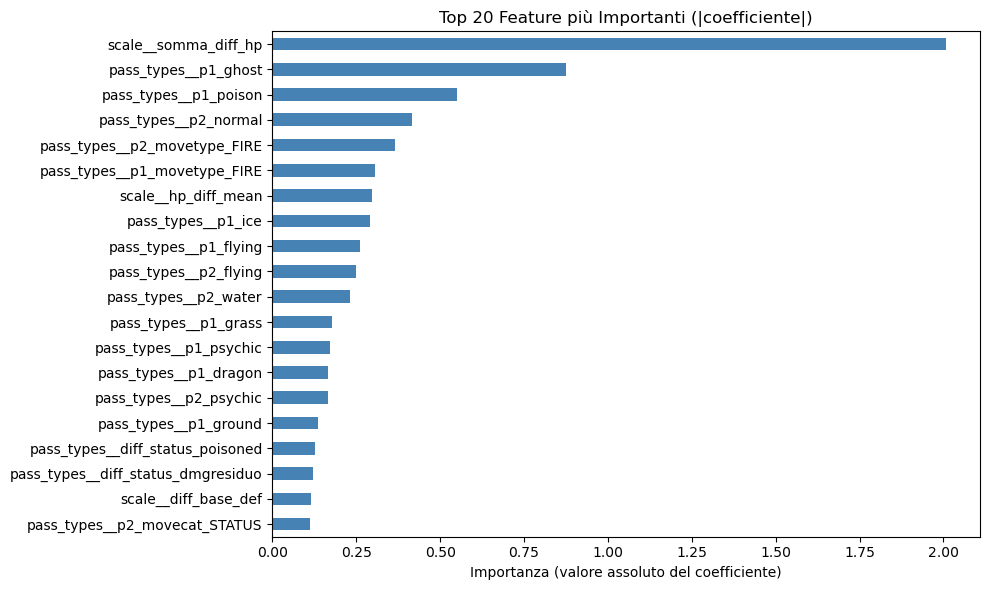

In [32]:
# === Analisi delle feature più importanti (dopo il fit finale) ===

import numpy as np
import matplotlib.pyplot as plt

# Ottieni i nomi delle feature dopo il preprocessing
feature_names = pipe.named_steps["preprocessor"].get_feature_names_out()

# Ottieni i coefficienti del modello logistico
coefs = pipe.named_steps["model"].coef_[0]

# Crea una serie ordinata per importanza assoluta
coef_series = pd.Series(coefs, index=feature_names)
coef_abs_sorted = coef_series.abs().sort_values(ascending=False)

print("\n=== Top 50 feature più influenti ===")
print(coef_abs_sorted.head(50))

# Mostra anche i coefficienti positivi e negativi principali
print("\n--- Top 10 feature che favoriscono la vittoria (player_won = 1) ---")
print(coef_series.sort_values(ascending=False).head(10))
print("\n--- Top 10 feature che sfavoriscono la vittoria (player_won = 0) ---")
print(coef_series.sort_values(ascending=True).head(10))

# === Visualizzazione grafica ===
plt.figure(figsize=(10, 6))
coef_abs_sorted.head(20).plot(kind='barh', color='steelblue')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature più Importanti (|coefficiente|)")
plt.xlabel("Importanza (valore assoluto del coefficiente)")
plt.tight_layout()
plt.show()


Correlazione 8380

In [33]:
#####################  Train new model-dynamics ##########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list,True)
test_df = extract_all(test_list,False)  # <-- Assicurati di avere anche il test_list definito

#Controllo correlazione

print("\n=== ANALISI COLLINEARITÀ DELLE FEATURE ===")

# 1️⃣ Seleziona tutte le colonne numeriche (esclude target e ID)
num_cols_all = [
    c for c in train_df.columns
    if c not in ['player_won', 'battle_id']
       and pd.api.types.is_numeric_dtype(train_df[c])
]

# 2️⃣ Calcolo della matrice di correlazione assoluta
corr = train_df[num_cols_all].corr().abs()

# 3️⃣ Trova le coppie con correlazione > soglia
threshold = 0.90
high_pairs = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if corr.iloc[i, j] > threshold:
            high_pairs.append((cols[i], cols[j], corr.iloc[i, j]))

high_pairs_sorted = sorted(high_pairs, key=lambda x: x[2], reverse=True)

# 4️⃣ Mostra risultati
if not high_pairs_sorted:
    print("✅ Nessuna coppia con correlazione > {:.2f}".format(threshold))
else:
    print(f"⚠️  {len(high_pairs_sorted)} coppie altamente correlate (>{threshold:.2f}):\n")
    for a, b, c in high_pairs_sorted[:40]:
        print(f"{a:35s} ~ {b:35s} : {c:.3f}")
    if len(high_pairs_sorted) > 40:
        print("... (troncato)")

# 5️⃣ (Facoltativo) Rimozione automatica di una feature per coppia
auto_drop = False  # Imposta a False se vuoi solo analizzare
if auto_drop and high_pairs_sorted:
    to_drop = set()
    for a, b, c in high_pairs_sorted:
        if a not in to_drop and b not in to_drop:
            # Mantiene la prima e droppa la seconda
            to_drop.add(b)

    print(f"\n🧹 Rimuovo automaticamente {len(to_drop)} colonne collineari:")
    print(sorted(list(to_drop))[:30])
    if len(to_drop) > 30:
        print("...")

    train_df = train_df.drop(columns=list(to_drop))
    test_df = test_df.drop(columns=[c for c in to_drop if c in test_df.columns], errors='ignore')
else:
    print("\nNessuna colonna rimossa automaticamente.")

# 6️⃣ Salva la matrice di correlazione completa per analisi offline
corr.to_csv("feature_correlation_matrix_full.csv", index=False)
print("📁 Matrice di correlazione salvata in 'feature_correlation_matrix_full.csv'")
print("=== Fine analisi collinearità ===\n")


########################

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42,
        C=0.5,  
        penalty='l1',
        solver='liblinear'
        ))#C=0.7, penalty='l2'
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_correlazione.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

ELASTICNET 8380, ha rilevato che il mio modello funziona meglio con un tipo l1

In [34]:
#####################  Train new model-dynamics (ElasticNet + GridSearch) ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df = extract_all(test_list, False)

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols=[ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols=['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def', 
             'diff_base_spa','diff_base_spd','diff_base_spe','diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline base ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42,
        solver='saga',
        penalty='elasticnet'
    ))
])

# === GridSearchCV ===
param_grid = {
    'model__C': [0.1, 0.3, 0.5, 0.7, 1.0],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("🔍 Avvio GridSearchCV per ElasticNet Logistic Regression...")
grid.fit(X, y)

print("\n✅ MIGLIORI PARAMETRI TROVATI:")
print(grid.best_params_)
print(f"ROC AUC medio (CV): {grid.best_score_:.4f}")

# === Miglior modello trovato ===
best_model = grid.best_estimator_

# === Cross-validation finale con i migliori parametri ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(best_model, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("\n=== Risultati Cross-Validation (10-fold, migliori parametri) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutto il dataset ===
best_model.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = best_model.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_elasticnet_grid.csv', index=False)

print("\n✅ 'submission_elasticnet_grid.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

Accuracy : 0.8345
Precision: 0.8358
Recall   : 0.8326
F1-score : 0.8342
ROC AUC  : 0.9014

STESSO MODELLO CON SPLIT 80/20

In [35]:
#####################  Train new model-dynamics (split version) ##########################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df = extract_all(test_list, False)

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols = ['p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols = ["diff_status_stunned","diff_status_dmgresiduo"]

effect_cols = ["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
               "p1_effect_transform","p2_effect_transform"]

boost_cols = [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols = ['p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols = ['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols = ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42,
        C=0.5,  
        penalty='l1',
        solver='liblinear'
    ))
])

# === Train/Validation Split ===
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Training ===
pipe.fit(X_train, y_train)

# === Validation Evaluation ===
y_pred = pipe.predict(X_val)
y_prob = pipe.predict_proba(X_val)[:, 1]

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc = roc_auc_score(y_val, y_prob)

print("=== Risultati Validation (80/20 Split) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_split.csv', index=False)

print("\n✅ 'submission_split.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

BINARIO

In [36]:
#Creazione del modello da allenare(Statico, prima del match)
#differenze tra squadra e primo pokemon del secondo 
import pandas as pd

def extract_feature_diff_bin(lista,isTrain):
    df_battle = lista[0]
    df_pokemon = lista[2]
    df_squad = lista[1]

    unique_types = unique_t(lista)  # funzione che restituisce tutti i tipi unici

    # --- PLAYER 1 ---
    df_squad["types_clean"] = df_squad["types"].apply(lambda x: [t for t in x if t != "notype"])
    agg_squad1 = df_squad.groupby("battle_id").agg({
        "base_hp": "mean",
        "base_atk": "mean",
        "base_def": "mean",
        "base_spa": "mean",
        "base_spd": "mean",
        "base_spe": "mean",
        "level": "mean",
        "types_clean": lambda lst: [t for sub in lst for t in sub]
    }).reset_index()

    for t in unique_types:
        agg_squad1[t] = agg_squad1["types_clean"].apply(lambda lst: 1 if t in lst else 0)

    agg_squad1 = (
        agg_squad1
        .drop(columns=["types_clean"])
        .add_prefix("p1_")
        .rename(columns={"p1_battle_id": "battle_id"})
    )

    # --- PLAYER 2 ---
    df_squad2 = df_pokemon.copy()
    df_squad2["types_clean"] = df_squad2["types"].apply(lambda x: [t for t in x if t != "notype"])
    for t in unique_types:
        df_squad2[t] = df_squad2["types_clean"].apply(lambda lst: 1 if t in lst else 0)

    df_squad2 = df_squad2.drop(columns=["types_clean", "types", "name"], errors="ignore")
    agg_squad2 = df_squad2.add_prefix("p2_").rename(columns={"p2_battle_id": "battle_id"})

    # --- UNIONE FINALE ---
    agg_full = agg_squad1.merge(agg_squad2, on="battle_id", how="inner")
    agg_full = agg_full.merge(df_battle[["battle_id", "player_won"]], on="battle_id", how="left")
    
    #controllo per evitare errori durante test
    # Se il dataset è di train, converti la colonna; se è di test, lasciala così
    if isTrain:
        agg_full["player_won"] = agg_full["player_won"].astype(int)
    else:
        agg_full["player_won"] = None
    # --- DIFFERENZE TRA P1 E P2 ---
    base_stats = ["base_hp", "base_atk", "base_def", "base_spa", "base_spd", "base_spe", "level"]
    for stat in base_stats:
        col_p1 = f"p1_{stat}"
        col_p2 = f"p2_{stat}"
        diff_col = f"diff_{stat}"
        agg_full[diff_col] = agg_full[col_p1] - agg_full[col_p2]

    # --- X RIMUOVERE LE FEATURE ORIGINALI, sarebbero ridondanti 
    cols_to_drop = [f"p1_{s}" for s in base_stats] + [f"p2_{s}" for s in base_stats]
    agg_full = agg_full.drop(columns=cols_to_drop)
    #print(agg_full)
    return agg_full.fillna(0)

#extract_feature_diff(train_list)


In [37]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all_bin(lista, is_train):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff_bin(lista, is_train)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS raggruppamento 
    p_status = ragg_status(df_battle_timeline,unique_status) 

    #EFFETTI raggruppamento
    p_effects = ragg_effects(df_battle_timeline,unique_effects)    

    #(TO-DO) TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p_status,
        p_effects,
        df_boosts,
        p1_moves, 
        p2_moves
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features
        .merge(dynamic_full, on='battle_id', how='left')
    )

    #feature di interazione
    train_df["somma_diff_hp"] = (
        train_df["somma_diff_hp"] - train_df["somma_diff_hp"].mean()
    ) / train_df["somma_diff_hp"].std()
    print(train_df.columns)
    return train_df.fillna(0)

In [38]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all_bin(train_list,True)
test_df = extract_all_bin(test_list,False)  # <-- Assicurati di avere anche il test_list definito

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42,
        C=0.5,  
        penalty='l1',
        solver='liblinear'
        ))
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_cc.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\844614890.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

modello con tutti i tipi, 0.8366

In [39]:
#Creazione del modello con veramente tutti i tipi di pokemon
def extract_all_tottipi(lista, is_train):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff_tottipi(lista, is_train)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS raggruppamento 
    p_status = ragg_status(df_battle_timeline,unique_status) 

    #EFFETTI raggruppamento
    p_effects = ragg_effects(df_battle_timeline,unique_effects)    

    #(TO-DO) TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p_status,
        p_effects,
        df_boosts,
        p1_moves, 
        p2_moves
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features
        .merge(dynamic_full, on='battle_id', how='left')
    )

    #feature di interazione
    train_df["somma_diff_hp"] = (
        train_df["somma_diff_hp"] - train_df["somma_diff_hp"].mean()
    ) / train_df["somma_diff_hp"].std()
    print(train_df.columns)
    return train_df.fillna(0)

In [40]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all_tottipi(train_list,True)
test_df = extract_all_tottipi(test_list,False)  # <-- Assicurati di avere anche il test_list definito

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42,
        C=0.5,#0.7,#  
        penalty='l1',#'l2',#
        solver='liblinear'
        ))#C=0.7, penalty='l2'
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_totti.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_effect_confuse',
       'p1_effect_transform', 'p2_effe

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\1320463780.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_effect_confuse',
       'p1_effect_transform', 'p2_effect_transform', 'p1_boost_atk',
       'p1_boost_def', 'p1_boost_spa', 'p1_boost_spd', 'p1_boost_spe',
       'p2_boost_atk', 'p2_boost_def', 'p2_boost_spa', 'p2_

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

Controllo su 8366


=== Top 50 feature più influenti ===
scale__somma_diff_hp                  1.926178
pass_types__p1_ghost                  0.789461
scale__p2team_size                    0.676527
pass_types__p1_poison                 0.579704
pass_types__p2_ghost                  0.374844
pass_types__p2_ice                    0.354018
pass_types__p1_movetype_FIRE          0.336912
pass_types__p2_movetype_FIRE          0.331763
pass_types__p1_ice                    0.204878
scale__hp_diff_mean                   0.203282
pass_types__p2_poison                 0.190841
pass_types__p1_grass                  0.165166
pass_types__p2_ground                 0.144735
pass_types__p2_normal                 0.139428
pass_types__p1_flying                 0.139369
pass_types__diff_status_poisoned      0.133443
pass_types__diff_status_dmgresiduo    0.130313
pass_types__p2_psychic                0.127233
pass_types__p2_electric               0.098959
pass_types__p1_movetype_POISON        0.098819
pass_types__p1_psychic

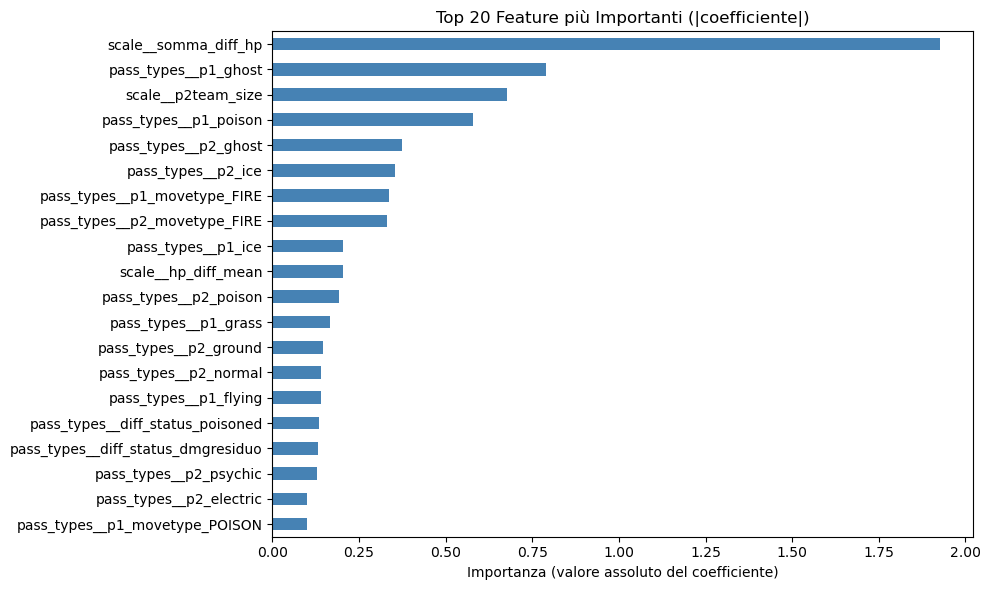

In [41]:
# === Analisi delle feature più importanti (dopo il fit finale) ===

import numpy as np
import matplotlib.pyplot as plt

# Ottieni i nomi delle feature dopo il preprocessing
feature_names = pipe.named_steps["preprocessor"].get_feature_names_out()

# Ottieni i coefficienti del modello logistico
coefs = pipe.named_steps["model"].coef_[0]

# Crea una serie ordinata per importanza assoluta
coef_series = pd.Series(coefs, index=feature_names)
coef_abs_sorted = coef_series.abs().sort_values(ascending=False)

print("\n=== Top 50 feature più influenti ===")
print(coef_abs_sorted.head(50))

# Mostra anche i coefficienti positivi e negativi principali
print("\n--- Top 10 feature che favoriscono la vittoria (player_won = 1) ---")
print(coef_series.sort_values(ascending=False).head(10))
print("\n--- Top 10 feature che sfavoriscono la vittoria (player_won = 0) ---")
print(coef_series.sort_values(ascending=True).head(10))

# === Visualizzazione grafica ===
plt.figure(figsize=(10, 6))
coef_abs_sorted.head(20).plot(kind='barh', color='steelblue')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature più Importanti (|coefficiente|)")
plt.xlabel("Importanza (valore assoluto del coefficiente)")
plt.tight_layout()
plt.show()


MINIMIZZARE IL LEAKAGE, di:
    tipi 
    pokemon

C=1,
penalty='l1',
solver='liblinear'

In [42]:
######################### K-FOLD TRAINING (VERSIONE MIGLIORATA + CONTROLLO FINALE) #########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Funzione per allineare le colonne tra train/val/test ===
def align_columns(df_target, df_reference):
    for c in df_reference.columns:
        if c not in df_target.columns:
            df_target[c] = 0
    missing_in_target = set(df_target.columns) - set(df_reference.columns)
    if missing_in_target:
        df_target = df_target.drop(columns=list(missing_in_target))
    return df_target[df_reference.columns]

# === Funzione per creare pokedex "sicuro" ===
def create_pokedex_safe(lista_df):
    df_squad, df_pokemon = lista_df[1], lista_df[2]
    df_all = pd.concat([df_squad, df_pokemon], ignore_index=True)
    df_all["types"] = df_all["types"].apply(lambda x: tuple(x) if isinstance(x, list) else x)
    return df_all.drop_duplicates(subset=["name", "types"]).reset_index(drop=True)

# === Imposta feature ===
type_cols = [ 
 'p1_dragon','p1_electric','p1_fire','p1_flying','p1_ghost','p1_grass','p1_ground','p1_ice',
 'p1_normal','p1_notype','p1_poison','p1_psychic','p1_rock','p1_water',
 'p2_dragon','p2_electric','p2_fire','p2_flying','p2_ghost','p2_grass','p2_ground','p2_ice',
 'p2_normal','p2_notype','p2_poison','p2_psychic','p2_rock','p2_water'
]
status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]
boost_cols=['p1_boost_atk','p1_boost_def','p1_boost_spa','p1_boost_spd','p1_boost_spe',
            'p2_boost_atk','p2_boost_def','p2_boost_spa','p2_boost_spd','p2_boost_spe']
move_type_cols=['p1_movetype_ELECTRIC','p1_movetype_FIGHTING','p1_movetype_FIRE','p1_movetype_FLYING',
 'p1_movetype_GHOST','p1_movetype_GRASS','p1_movetype_GROUND','p1_movetype_ICE','p1_movetype_NORMAL',
 'p1_movetype_POISON','p1_movetype_PSYCHIC','p1_movetype_ROCK','p1_movetype_WATER',
 'p2_movetype_ELECTRIC','p2_movetype_FIGHTING','p2_movetype_FIRE','p2_movetype_FLYING',
 'p2_movetype_GHOST','p2_movetype_GRASS','p2_movetype_GROUND','p2_movetype_ICE','p2_movetype_NORMAL',
 'p2_movetype_POISON','p2_movetype_PSYCHIC','p2_movetype_ROCK','p2_movetype_WATER']
move_cat_cols=['p1_movecat_PHYSICAL','p1_movecat_SPECIAL','p1_movecat_STATUS',
               'p2_movecat_PHYSICAL','p2_movecat_SPECIAL','p2_movecat_STATUS']
match_cols=['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def',
            'diff_base_spa','diff_base_spd','diff_base_spe','diff_level',
            'move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp']

# === Preprocessing ===
num_cols = match_cols
passthrough_cols = type_cols + status_cols + effect_cols + boost_cols + move_type_cols + move_cat_cols

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('pass', 'passthrough', passthrough_cols)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000,
        random_state=42,
        C=1,
        penalty='l1',
        solver='liblinear'
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Inizio cross-validation pulita...\n")

oof_preds, oof_probs, fold_accs = [], [], []
y_full = [b['player_won'] for b in train_data]

for fold, (tr_idx, va_idx) in enumerate(cv.split(np.zeros(len(train_data)), y_full)):
    print(f"===== FOLD {fold+1} =====")

    # split manuale
    train_fold_data = [train_data[i] for i in tr_idx]
    val_fold_data   = [train_data[i] for i in va_idx]

    train_list_fold = create_dataframe(train_fold_data)
    val_list_fold   = create_dataframe(val_fold_data)

    train_fold_df = extract_all_tottipi(train_list_fold, True)
    val_fold_df   = extract_all_tottipi(val_list_fold, True)

    # debug prints
    print("status unici:", sorted(train_fold_df.filter(like="status_").columns.str.replace("p1_status_","").str.replace("p2_status_","").unique()))
    print("EFFECTS unici:", sorted(train_fold_df.filter(like="effect_").columns.str.replace("p1_effect_","").str.replace("p2_effect_","").unique()))
    print(train_fold_df.columns)

    # allineamento
    val_fold_df = align_columns(val_fold_df, train_fold_df)

    X_tr = train_fold_df.drop(columns=['player_won','battle_id'])
    y_tr = train_fold_df['player_won']
    X_va = val_fold_df.drop(columns=['player_won','battle_id'])
    y_va = val_fold_df['player_won']

    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_va)
    probs = pipe.predict_proba(X_va)[:,1]

    oof_preds.extend(preds)
    oof_probs.extend(probs)
    acc = accuracy_score(y_va, preds)
    fold_accs.append(acc)
    print(f"Fold {fold+1} accuracy: {acc:.4f}")

# metriche OOF
acc = accuracy_score(y_full, oof_preds)
roc = roc_auc_score(y_full, oof_probs)
print("\n=== RISULTATI OOF (10-fold) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC : {roc:.4f}")
print(f"Media per fold: {np.mean(fold_accs):.4f}")

# === Fit finale su tutto il train ===
print("\nAddestro il modello finale su tutto il train...")
train_df = extract_all_tottipi(train_list, True)
test_df  = extract_all_tottipi(test_list, False)
test_df = align_columns(test_df, train_df)

X = train_df.drop(columns=['player_won','battle_id'])
y = train_df['player_won']
X_test = test_df.drop(columns=['battle_id'])

pipe.fit(X, y)

# === Controllo dell'accuracy sul TRAIN completo ===
train_preds = pipe.predict(X)
train_probs = pipe.predict_proba(X)[:, 1]
train_acc = accuracy_score(y, train_preds)
train_roc = roc_auc_score(y, train_probs)
print(f"\n✅ Accuracy sul TRAIN completo (fit finale): {train_acc:.4f}"+f" e Media per fold: {np.mean(fold_accs):.4f}")
print(f"✅ ROC AUC  TRAIN (fit finale): {train_roc:.4f}")

# === Predizione sul TEST ===
test_preds = pipe.predict(X_test)
submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_preds
})
submission_df.to_csv("submission_chattt2.csv", index=False)
print("\n✅ File 'submission_chattt.csv' creato con successo!")
print(submission_df.head())


Inizio cross-validation pulita...

===== FOLD 1 =====
status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_e

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\1320463780.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_effect_confuse',
       'p1_effect_transform', 'p2_effect_transform', 'p1_boost_atk',
       'p1_boost_def', 'p1_boost_spa', 'p1_boost_spd', 'p1_boost_spe',
       'p2_boost_atk', 'p2_boost_def', 'p2_boost_spa', 'p2_

C=0.5,
penalty='l1',
solver='liblinear'

In [43]:
######################### K-FOLD TRAINING (VERSIONE MIGLIORATA + CONTROLLO FINALE) #########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Funzione per allineare le colonne tra train/val/test ===
def align_columns(df_target, df_reference):
    for c in df_reference.columns:
        if c not in df_target.columns:
            df_target[c] = 0
    missing_in_target = set(df_target.columns) - set(df_reference.columns)
    if missing_in_target:
        df_target = df_target.drop(columns=list(missing_in_target))
    return df_target[df_reference.columns]

# === Funzione per creare pokedex "sicuro" ===
def create_pokedex_safe(lista_df):
    df_squad, df_pokemon = lista_df[1], lista_df[2]
    df_all = pd.concat([df_squad, df_pokemon], ignore_index=True)
    df_all["types"] = df_all["types"].apply(lambda x: tuple(x) if isinstance(x, list) else x)
    return df_all.drop_duplicates(subset=["name", "types"]).reset_index(drop=True)

# === Imposta feature ===
type_cols = [ 
 'p1_dragon','p1_electric','p1_fire','p1_flying','p1_ghost','p1_grass','p1_ground','p1_ice',
 'p1_normal','p1_notype','p1_poison','p1_psychic','p1_rock','p1_water',
 'p2_dragon','p2_electric','p2_fire','p2_flying','p2_ghost','p2_grass','p2_ground','p2_ice',
 'p2_normal','p2_notype','p2_poison','p2_psychic','p2_rock','p2_water'
]
status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]
boost_cols=['p1_boost_atk','p1_boost_def','p1_boost_spa','p1_boost_spd','p1_boost_spe',
            'p2_boost_atk','p2_boost_def','p2_boost_spa','p2_boost_spd','p2_boost_spe']
move_type_cols=['p1_movetype_ELECTRIC','p1_movetype_FIGHTING','p1_movetype_FIRE','p1_movetype_FLYING',
 'p1_movetype_GHOST','p1_movetype_GRASS','p1_movetype_GROUND','p1_movetype_ICE','p1_movetype_NORMAL',
 'p1_movetype_POISON','p1_movetype_PSYCHIC','p1_movetype_ROCK','p1_movetype_WATER',
 'p2_movetype_ELECTRIC','p2_movetype_FIGHTING','p2_movetype_FIRE','p2_movetype_FLYING',
 'p2_movetype_GHOST','p2_movetype_GRASS','p2_movetype_GROUND','p2_movetype_ICE','p2_movetype_NORMAL',
 'p2_movetype_POISON','p2_movetype_PSYCHIC','p2_movetype_ROCK','p2_movetype_WATER']
move_cat_cols=['p1_movecat_PHYSICAL','p1_movecat_SPECIAL','p1_movecat_STATUS',
               'p2_movecat_PHYSICAL','p2_movecat_SPECIAL','p2_movecat_STATUS']
match_cols=['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def',
            'diff_base_spa','diff_base_spd','diff_base_spe','diff_level',
            'move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp']

# === Preprocessing ===
num_cols = match_cols
passthrough_cols = type_cols + status_cols + effect_cols + boost_cols + move_type_cols + move_cat_cols

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('pass', 'passthrough', passthrough_cols)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000,
        random_state=42,
        C=0.5,
        penalty='l1',
        solver='liblinear'
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Inizio cross-validation pulita...\n")

oof_preds, oof_probs, fold_accs = [], [], []
y_full = [b['player_won'] for b in train_data]

for fold, (tr_idx, va_idx) in enumerate(cv.split(np.zeros(len(train_data)), y_full)):
    print(f"===== FOLD {fold+1} =====")

    # split manuale
    train_fold_data = [train_data[i] for i in tr_idx]
    val_fold_data   = [train_data[i] for i in va_idx]

    train_list_fold = create_dataframe(train_fold_data)
    val_list_fold   = create_dataframe(val_fold_data)

    train_fold_df = extract_all_tottipi(train_list_fold, True)
    val_fold_df   = extract_all_tottipi(val_list_fold, True)

    # debug prints
    print("status unici:", sorted(train_fold_df.filter(like="status_").columns.str.replace("p1_status_","").str.replace("p2_status_","").unique()))
    print("EFFECTS unici:", sorted(train_fold_df.filter(like="effect_").columns.str.replace("p1_effect_","").str.replace("p2_effect_","").unique()))
    print(train_fold_df.columns)

    # allineamento
    val_fold_df = align_columns(val_fold_df, train_fold_df)

    X_tr = train_fold_df.drop(columns=['player_won','battle_id'])
    y_tr = train_fold_df['player_won']
    X_va = val_fold_df.drop(columns=['player_won','battle_id'])
    y_va = val_fold_df['player_won']

    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_va)
    probs = pipe.predict_proba(X_va)[:,1]

    oof_preds.extend(preds)
    oof_probs.extend(probs)
    acc = accuracy_score(y_va, preds)
    fold_accs.append(acc)
    print(f"Fold {fold+1} accuracy: {acc:.4f}")

# metriche OOF
acc = accuracy_score(y_full, oof_preds)
roc = roc_auc_score(y_full, oof_probs)
print("\n=== RISULTATI OOF (10-fold) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC : {roc:.4f}")
print(f"Media per fold: {np.mean(fold_accs):.4f}")

# === Fit finale su tutto il train ===
print("\nAddestro il modello finale su tutto il train...")
train_df = extract_all_tottipi(train_list, True)
test_df  = extract_all_tottipi(test_list, False)
test_df = align_columns(test_df, train_df)

X = train_df.drop(columns=['player_won','battle_id'])
y = train_df['player_won']
X_test = test_df.drop(columns=['battle_id'])

pipe.fit(X, y)

# === Controllo dell'accuracy sul TRAIN completo ===
train_preds = pipe.predict(X)
train_probs = pipe.predict_proba(X)[:, 1]
train_acc = accuracy_score(y, train_preds)
train_roc = roc_auc_score(y, train_probs)
print(f"\n✅ Accuracy sul TRAIN completo (fit finale): {train_acc:.4f}"+f" e Media per fold: {np.mean(fold_accs):.4f}")
print(f"✅ ROC AUC  TRAIN (fit finale): {train_roc:.4f}")

# === Predizione sul TEST ===
test_preds = pipe.predict(X_test)
submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_preds
})
submission_df.to_csv("submission_foldman.csv", index=False)
print("\n✅ File 'submission_chattt.csv' creato con successo!")
print(submission_df.head())


Inizio cross-validation pulita...

===== FOLD 1 =====
status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_e

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\1320463780.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_effect_confuse',
       'p1_effect_transform', 'p2_effect_transform', 'p1_boost_atk',
       'p1_boost_def', 'p1_boost_spa', 'p1_boost_spd', 'p1_boost_spe',
       'p2_boost_atk', 'p2_boost_def', 'p2_boost_spa', 'p2_

C=0.7,
penalty='l1',
solver='liblinear'

In [44]:
######################### K-FOLD TRAINING (VERSIONE MIGLIORATA + CONTROLLO FINALE) #########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Funzione per allineare le colonne tra train/val/test ===
def align_columns(df_target, df_reference):
    for c in df_reference.columns:
        if c not in df_target.columns:
            df_target[c] = 0
    missing_in_target = set(df_target.columns) - set(df_reference.columns)
    if missing_in_target:
        df_target = df_target.drop(columns=list(missing_in_target))
    return df_target[df_reference.columns]

# === Funzione per creare pokedex "sicuro" ===
def create_pokedex_safe(lista_df):
    df_squad, df_pokemon = lista_df[1], lista_df[2]
    df_all = pd.concat([df_squad, df_pokemon], ignore_index=True)
    df_all["types"] = df_all["types"].apply(lambda x: tuple(x) if isinstance(x, list) else x)
    return df_all.drop_duplicates(subset=["name", "types"]).reset_index(drop=True)

# === Imposta feature ===
type_cols = [ 
 'p1_dragon','p1_electric','p1_fire','p1_flying','p1_ghost','p1_grass','p1_ground','p1_ice',
 'p1_normal','p1_notype','p1_poison','p1_psychic','p1_rock','p1_water',
 'p2_dragon','p2_electric','p2_fire','p2_flying','p2_ghost','p2_grass','p2_ground','p2_ice',
 'p2_normal','p2_notype','p2_poison','p2_psychic','p2_rock','p2_water'
]
status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]
boost_cols=['p1_boost_atk','p1_boost_def','p1_boost_spa','p1_boost_spd','p1_boost_spe',
            'p2_boost_atk','p2_boost_def','p2_boost_spa','p2_boost_spd','p2_boost_spe']
move_type_cols=['p1_movetype_ELECTRIC','p1_movetype_FIGHTING','p1_movetype_FIRE','p1_movetype_FLYING',
 'p1_movetype_GHOST','p1_movetype_GRASS','p1_movetype_GROUND','p1_movetype_ICE','p1_movetype_NORMAL',
 'p1_movetype_POISON','p1_movetype_PSYCHIC','p1_movetype_ROCK','p1_movetype_WATER',
 'p2_movetype_ELECTRIC','p2_movetype_FIGHTING','p2_movetype_FIRE','p2_movetype_FLYING',
 'p2_movetype_GHOST','p2_movetype_GRASS','p2_movetype_GROUND','p2_movetype_ICE','p2_movetype_NORMAL',
 'p2_movetype_POISON','p2_movetype_PSYCHIC','p2_movetype_ROCK','p2_movetype_WATER']
move_cat_cols=['p1_movecat_PHYSICAL','p1_movecat_SPECIAL','p1_movecat_STATUS',
               'p2_movecat_PHYSICAL','p2_movecat_SPECIAL','p2_movecat_STATUS']
match_cols=['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def',
            'diff_base_spa','diff_base_spd','diff_base_spe','diff_level',
            'move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp']

# === Preprocessing ===
num_cols = match_cols
passthrough_cols = type_cols + status_cols + effect_cols + boost_cols + move_type_cols + move_cat_cols

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('pass', 'passthrough', passthrough_cols)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000,
        random_state=42,
        C=0.7,
        penalty='l1',
        solver='liblinear'
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Inizio cross-validation pulita...\n")

oof_preds, oof_probs, fold_accs = [], [], []
y_full = [b['player_won'] for b in train_data]

for fold, (tr_idx, va_idx) in enumerate(cv.split(np.zeros(len(train_data)), y_full)):
    print(f"===== FOLD {fold+1} =====")

    # split manuale
    train_fold_data = [train_data[i] for i in tr_idx]
    val_fold_data   = [train_data[i] for i in va_idx]

    train_list_fold = create_dataframe(train_fold_data)
    val_list_fold   = create_dataframe(val_fold_data)

    train_fold_df = extract_all_tottipi(train_list_fold, True)
    val_fold_df   = extract_all_tottipi(val_list_fold, True)

    # debug prints
    print("status unici:", sorted(train_fold_df.filter(like="status_").columns.str.replace("p1_status_","").str.replace("p2_status_","").unique()))
    print("EFFECTS unici:", sorted(train_fold_df.filter(like="effect_").columns.str.replace("p1_effect_","").str.replace("p2_effect_","").unique()))
    print(train_fold_df.columns)

    # allineamento
    val_fold_df = align_columns(val_fold_df, train_fold_df)

    X_tr = train_fold_df.drop(columns=['player_won','battle_id'])
    y_tr = train_fold_df['player_won']
    X_va = val_fold_df.drop(columns=['player_won','battle_id'])
    y_va = val_fold_df['player_won']

    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_va)
    probs = pipe.predict_proba(X_va)[:,1]

    oof_preds.extend(preds)
    oof_probs.extend(probs)
    acc = accuracy_score(y_va, preds)
    fold_accs.append(acc)
    print(f"Fold {fold+1} accuracy: {acc:.4f}")

# metriche OOF
acc = accuracy_score(y_full, oof_preds)
roc = roc_auc_score(y_full, oof_probs)
print("\n=== RISULTATI OOF (10-fold) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC : {roc:.4f}")
print(f"Media per fold: {np.mean(fold_accs):.4f}")

# === Fit finale su tutto il train ===
print("\nAddestro il modello finale su tutto il train...")
train_df = extract_all_tottipi(train_list, True)
test_df  = extract_all_tottipi(test_list, False)
test_df = align_columns(test_df, train_df)

X = train_df.drop(columns=['player_won','battle_id'])
y = train_df['player_won']
X_test = test_df.drop(columns=['battle_id'])

pipe.fit(X, y)

# === Controllo dell'accuracy sul TRAIN completo ===
train_preds = pipe.predict(X)
train_probs = pipe.predict_proba(X)[:, 1]
train_acc = accuracy_score(y, train_preds)
train_roc = roc_auc_score(y, train_probs)
print(f"\n✅ Accuracy sul TRAIN completo (fit finale): {train_acc:.4f}"+f" e Media per fold: {np.mean(fold_accs):.4f}")
print(f"✅ ROC AUC  TRAIN (fit finale): {train_roc:.4f}")

# === Predizione sul TEST ===
test_preds = pipe.predict(X_test)
submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_preds
})
submission_df.to_csv("submission_chattt2.csv", index=False)
print("\n✅ File 'submission_chattt.csv' creato con successo!")
print(submission_df.head())


Inizio cross-validation pulita...

===== FOLD 1 =====
status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_e

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\1320463780.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_effect_confuse',
       'p1_effect_transform', 'p2_effect_transform', 'p1_boost_atk',
       'p1_boost_def', 'p1_boost_spa', 'p1_boost_spd', 'p1_boost_spe',
       'p2_boost_atk', 'p2_boost_def', 'p2_boost_spa', 'p2_

 C=0.7,
penalty='l2',
solver='liblinear'

In [45]:
######################### K-FOLD TRAINING (VERSIONE MIGLIORATA + CONTROLLO FINALE) #########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Funzione per allineare le colonne tra train/val/test ===
def align_columns(df_target, df_reference):
    for c in df_reference.columns:
        if c not in df_target.columns:
            df_target[c] = 0
    missing_in_target = set(df_target.columns) - set(df_reference.columns)
    if missing_in_target:
        df_target = df_target.drop(columns=list(missing_in_target))
    return df_target[df_reference.columns]

# === Funzione per creare pokedex "sicuro" ===
def create_pokedex_safe(lista_df):
    df_squad, df_pokemon = lista_df[1], lista_df[2]
    df_all = pd.concat([df_squad, df_pokemon], ignore_index=True)
    df_all["types"] = df_all["types"].apply(lambda x: tuple(x) if isinstance(x, list) else x)
    return df_all.drop_duplicates(subset=["name", "types"]).reset_index(drop=True)

# === Imposta feature ===
type_cols = [ 
 'p1_dragon','p1_electric','p1_fire','p1_flying','p1_ghost','p1_grass','p1_ground','p1_ice',
 'p1_normal','p1_notype','p1_poison','p1_psychic','p1_rock','p1_water',
 'p2_dragon','p2_electric','p2_fire','p2_flying','p2_ghost','p2_grass','p2_ground','p2_ice',
 'p2_normal','p2_notype','p2_poison','p2_psychic','p2_rock','p2_water'
]
status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]
boost_cols=['p1_boost_atk','p1_boost_def','p1_boost_spa','p1_boost_spd','p1_boost_spe',
            'p2_boost_atk','p2_boost_def','p2_boost_spa','p2_boost_spd','p2_boost_spe']
move_type_cols=['p1_movetype_ELECTRIC','p1_movetype_FIGHTING','p1_movetype_FIRE','p1_movetype_FLYING',
 'p1_movetype_GHOST','p1_movetype_GRASS','p1_movetype_GROUND','p1_movetype_ICE','p1_movetype_NORMAL',
 'p1_movetype_POISON','p1_movetype_PSYCHIC','p1_movetype_ROCK','p1_movetype_WATER',
 'p2_movetype_ELECTRIC','p2_movetype_FIGHTING','p2_movetype_FIRE','p2_movetype_FLYING',
 'p2_movetype_GHOST','p2_movetype_GRASS','p2_movetype_GROUND','p2_movetype_ICE','p2_movetype_NORMAL',
 'p2_movetype_POISON','p2_movetype_PSYCHIC','p2_movetype_ROCK','p2_movetype_WATER']
move_cat_cols=['p1_movecat_PHYSICAL','p1_movecat_SPECIAL','p1_movecat_STATUS',
               'p2_movecat_PHYSICAL','p2_movecat_SPECIAL','p2_movecat_STATUS']
match_cols=['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def',
            'diff_base_spa','diff_base_spd','diff_base_spe','diff_level',
            'move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp']

# === Preprocessing ===
num_cols = match_cols
passthrough_cols = type_cols + status_cols + effect_cols + boost_cols + move_type_cols + move_cat_cols

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('pass', 'passthrough', passthrough_cols)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000,
        random_state=42,
        C=0.7,
        penalty='l2',
        solver='liblinear'
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Inizio cross-validation pulita...\n")

oof_preds, oof_probs, fold_accs = [], [], []
y_full = [b['player_won'] for b in train_data]

for fold, (tr_idx, va_idx) in enumerate(cv.split(np.zeros(len(train_data)), y_full)):
    print(f"===== FOLD {fold+1} =====")

    # split manuale
    train_fold_data = [train_data[i] for i in tr_idx]
    val_fold_data   = [train_data[i] for i in va_idx]

    train_list_fold = create_dataframe(train_fold_data)
    val_list_fold   = create_dataframe(val_fold_data)

    train_fold_df = extract_all_tottipi(train_list_fold, True)
    val_fold_df   = extract_all_tottipi(val_list_fold, True)

    # debug prints
    print("status unici:", sorted(train_fold_df.filter(like="status_").columns.str.replace("p1_status_","").str.replace("p2_status_","").unique()))
    print("EFFECTS unici:", sorted(train_fold_df.filter(like="effect_").columns.str.replace("p1_effect_","").str.replace("p2_effect_","").unique()))
    print(train_fold_df.columns)

    # allineamento
    val_fold_df = align_columns(val_fold_df, train_fold_df)

    X_tr = train_fold_df.drop(columns=['player_won','battle_id'])
    y_tr = train_fold_df['player_won']
    X_va = val_fold_df.drop(columns=['player_won','battle_id'])
    y_va = val_fold_df['player_won']

    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_va)
    probs = pipe.predict_proba(X_va)[:,1]

    oof_preds.extend(preds)
    oof_probs.extend(probs)
    acc = accuracy_score(y_va, preds)
    fold_accs.append(acc)
    print(f"Fold {fold+1} accuracy: {acc:.4f}")

# metriche OOF
acc = accuracy_score(y_full, oof_preds)
roc = roc_auc_score(y_full, oof_probs)
print("\n=== RISULTATI OOF (10-fold) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC : {roc:.4f}")
print(f"Media per fold: {np.mean(fold_accs):.4f}")

# === Fit finale su tutto il train ===
print("\nAddestro il modello finale su tutto il train...")
train_df = extract_all_tottipi(train_list, True)
test_df  = extract_all_tottipi(test_list, False)
test_df = align_columns(test_df, train_df)

X = train_df.drop(columns=['player_won','battle_id'])
y = train_df['player_won']
X_test = test_df.drop(columns=['battle_id'])

pipe.fit(X, y)

# === Controllo dell'accuracy sul TRAIN completo ===
train_preds = pipe.predict(X)
train_probs = pipe.predict_proba(X)[:, 1]
train_acc = accuracy_score(y, train_preds)
train_roc = roc_auc_score(y, train_probs)
print(f"\n✅ Accuracy sul TRAIN completo (fit finale): {train_acc:.4f}"+f" e Media per fold: {np.mean(fold_accs):.4f}")
print(f"✅ ROC AUC  TRAIN (fit finale): {train_roc:.4f}")

# === Predizione sul TEST ===
test_preds = pipe.predict(X_test)
submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_preds
})
submission_df.to_csv("submission_chattt2.csv", index=False)
print("\n✅ File 'submission_chattt.csv' creato con successo!")
print(submission_df.head())


Inizio cross-validation pulita...

===== FOLD 1 =====
status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_e

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\1320463780.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'p2team_size', 'hp_diff_mean',
       'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp',
       'diff_status_stunned', 'diff_status_poisoned', 'diff_status_dmgresiduo',
       'diff_effect_trap', 'diff_effect_buff', 'diff_effect_confuse',
       'p1_effect_transform', 'p2_effect_transform', 'p1_boost_atk',
       'p1_boost_def', 'p1_boost_spa', 'p1_boost_spd', 'p1_boost_spe',
       'p2_boost_atk', 'p2_boost_def', 'p2_boost_spa', 'p2_

PROVARE MODELLI DIFFERENTI

In [46]:
#####################  LogisticRegression   ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia: rimuovo le colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n ",train_df.columns)
# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico dei gruppi di feature ===
all_cols = X.columns.tolist()

type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        max_iter=5000,
        random_state=42,
        C=0.5,
        penalty="l1",
        solver="liblinear"
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold)...")
y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_cc.csv", index=False)

print("\n✅ File 'submission_cc.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

Random Forest

In [47]:
#####################  RandomForest (iperparametri ottimali fissi)  ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline con iperparametri fissi ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=8,
        min_samples_leaf=2,
        max_features=0.5,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])


# === Cross-validation 10-fold ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("\n🔁 Avvio cross-validation (10-fold) con iperparametri ottimali...")
y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizioni sul test set ===
pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_randomforest.csv", index=False)

print("\n✅ File 'submission_rf_bestparams.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

8220

In [48]:
#####################  RandomForest (iperparametri ottimali + CV robusta)  ##########################
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, cross_val_predict, cross_validate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, make_scorer
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline con iperparametri fissi (migliori) + più alberi ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=800,          # ↑ rispetto a 400 per più stabilità
        max_depth=None,
        min_samples_split=8,
        min_samples_leaf=2,
        max_features=0.5,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

# === 1) Valutazione robusta con RepeatedStratifiedKFold (no cross_val_predict qui) ===
cv_repeated = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}
print("\n🧪 Valutazione con RepeatedStratifiedKFold (10x3)...")
cv_res = cross_validate(pipe, X, y, cv=cv_repeated, scoring=scoring, n_jobs=-1, return_train_score=False)

def mean_std(k): 
    return f"{np.mean(cv_res['test_'+k]):.4f} ± {np.std(cv_res['test_'+k]):.4f}"

print("Accuracy :", mean_std("accuracy"))
print("Precision:", mean_std("precision"))
print("Recall   :", mean_std("recall"))
print("F1-score :", mean_std("f1"))
print("ROC AUC  :", mean_std("roc_auc"))

# === 2) Cross-val semplice (10-fold) per ottenere predizioni/probabilità e report completi ===
cv_simple = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("\n🔁 Cross-validation (10-fold) per confusion matrix & report...")
y_pred = cross_val_predict(pipe, X, y, cv=cv_simple, method="predict", n_jobs=-1)
y_prob = cross_val_predict(pipe, X, y, cv=cv_simple, method="predict_proba", n_jobs=-1)[:, 1]

acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI 10-fold (predizioni out-of-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === 3) Fit finale su tutto il training e predizioni sul test ===
print("\n🚀 Fit finale sul training completo e predizioni sul test set...")
pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
test_predictions = pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_rf_bestparams_800trees.csv", index=False)

print("\n✅ File 'submission_rf_bestparams_800trees.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

Feature importance

In [49]:
import numpy as np

# Estrai il modello e le feature
rf = pipe.named_steps["model"]
cols = pipe.named_steps["preprocessor"].get_feature_names_out()

feat_imp = pd.DataFrame({
    "feature": cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n🔥 Top 20 feature più importanti:")
display(feat_imp.head(20))

# Se vuoi salvarle
feat_imp.to_csv("feature_importance_rf.csv", index=False)



🔥 Top 20 feature più importanti:


,feature,importance
9,scale__somma_diff_hp,0.464085
44,pass_types__diff_status_stunned,0.086065
6,scale__hp_diff_mean,0.058338
8,scale__move_acc_diff_mean,0.020308
7,scale__move_basepow_diff_mean,0.018464
0,scale__diff_base_hp,0.015523
3,scale__diff_base_spa,0.014956
81,pass_types__p2_movecat_SPECIAL,0.013569
4,scale__diff_base_spe,0.013351
2,scale__diff_base_def,0.012692


XGBoost

In [50]:
#####################  XGBoost Classifier (pipeline analoga alla LogisticRegression)  ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia: rimuovo le colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico dei gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline con XGBoost ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        gamma=0.0,
        min_child_weight=3,
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=1,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("\n🔁 Avvio cross-validation (10-fold) con XGBoost...")

# Predizioni e probabilità out-of-fold
y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict", n_jobs=-1)
y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold, XGBoost) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set con XGBoost...")
test_predictions = pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_xgb.csv", index=False)

print("\n✅ File 'submission_xgb.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\xgboost\training.py:183: UserWarning: [15:32:21] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 Genero predizioni sul test set con XGBoost...

✅ File 'submission_xgb.csv' creato con successo!


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

xgb tuned 8320

In [51]:
#####################  XGBoost + RandomizedSearchCV  ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline base ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        tree_method="hist"   # ⚡ più veloce
    ))
])

# === Spazio degli iperparametri (distribuzioni random) ===
param_dist = {
    "model__n_estimators": randint(300, 900),
    "model__learning_rate": uniform(0.01, 0.15),  # 0.01–0.16
    "model__max_depth": randint(3, 9),
    "model__min_child_weight": randint(1, 6),
    "model__subsample": uniform(0.6, 0.4),        # 0.6–1.0
    "model__colsample_bytree": uniform(0.6, 0.4), # 0.6–1.0
    "model__gamma": uniform(0.0, 0.4),
    "model__reg_lambda": uniform(0.5, 1.5)
}

cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=40,             # ≈ 10–15 minuti su CPU
    scoring="roc_auc",     # o "f1", "accuracy"
    cv=cv_inner,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

print("\n🔍 Avvio RandomizedSearchCV per XGBoost...")
search.fit(X, y)

print("\n✅ Migliori iperparametri trovati:")
print(search.best_params_)
print(f"Miglior ROC-AUC cross-val: {search.best_score_:.4f}")

# === Pipeline ottimizzata ===
best_pipe = search.best_estimator_

# === Cross-validation esterna per valutazione ===
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(best_pipe, X, y, cv=cv_outer, method="predict", n_jobs=-1)
y_prob = cross_val_predict(best_pipe, X, y, cv=cv_outer, method="predict_proba", n_jobs=-1)[:, 1]

# === Metriche ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI FINALI (10-fold CV con migliori parametri XGBoost) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
best_pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set con XGBoost ottimizzato...")
test_predictions = best_pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_xgb_tuned.csv", index=False)

print("\n✅ File 'submission_xgb_tuned.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\xgboost\training.py:183: UserWarning: [15:35:11] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Migliori iperparametri trovati:
{'model__colsample_bytree': np.float64(0.8211572356285312), 'model__gamma': np.float64(0.23707868955175743), 'model__learning_rate': np.float64(0.022127998949907288), 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 593, 'model__reg_lambda': np.float64(1.05167469907888), 'model__subsample': np.float64(0.8529223322374317)}
Miglior ROC-AUC cross-val: 0.9002

=== RISULTATI FINALI (10-fold CV con migliori parametri XGBoost) ===
Accuracy : 0.8272
Precision: 0.8354
Recall   : 0.8150
F1-score : 0.8251
ROC AUC  : 0.9000

Confusion Matrix:
 [[4197  803]
 [ 925 4075]]

Classification Report:
               precision    recall  f1-score   support

           0      0.819     0.839     0.829      5000
           1      0.835     0.815     0.825      5000

    accuracy                          0.827     10000
   macro avg      0.827     0.827     0.827     10000
weighted avg      0.827     0.827     0.827     10000



c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\xgboost\training.py:183: UserWarning: [15:35:20] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 Genero predizioni sul test set con XGBoost ottimizzato...

✅ File 'submission_xgb_tuned.csv' creato con successo!


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [52]:
#####################  XGBoost + RandomizedSearchCV + Optimal Threshold  ##########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline base ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        tree_method="hist"   # ⚡ più veloce
    ))
])

# === Spazio degli iperparametri (distribuzioni random) ===
param_dist = {
    "model__n_estimators": randint(300, 900),
    "model__learning_rate": uniform(0.01, 0.15),
    "model__max_depth": randint(3, 9),
    "model__min_child_weight": randint(1, 6),
    "model__subsample": uniform(0.6, 0.4),
    "model__colsample_bytree": uniform(0.6, 0.4),
    "model__gamma": uniform(0.0, 0.4),
    "model__reg_lambda": uniform(0.5, 1.5)
}

cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="accuracy",
    cv=cv_inner,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

print("\n🔍 Avvio RandomizedSearchCV per XGBoost...")
search.fit(X, y)

print("\n✅ Migliori iperparametri trovati:")
print(search.best_params_)
print(f"Miglior ROC-AUC cross-val: {search.best_score_:.4f}")

# === Pipeline ottimizzata ===
best_pipe = search.best_estimator_

# === Cross-validation esterna per valutazione ===
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(best_pipe, X, y, cv=cv_outer, method="predict", n_jobs=-1)
y_prob = cross_val_predict(best_pipe, X, y, cv=cv_outer, method="predict_proba", n_jobs=-1)[:, 1]

# === Metriche base ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI FINALI (10-fold CV con migliori parametri XGBoost) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === 🔹 Ricerca soglia ottimale ===
thr_grid = np.linspace(0.3, 0.7, 81)
accs, f1s = [], []
for t in thr_grid:
    p = (y_prob >= t).astype(int)
    accs.append(accuracy_score(y, p))
    f1s.append(f1_score(y, p))

thr_acc = thr_grid[np.argmax(accs)]
thr_f1  = thr_grid[np.argmax(f1s)]
chosen_thr = (thr_acc + thr_f1) / 2

print(f"\n🔎 Soglia migliore per Accuracy: {thr_acc:.3f} | per F1: {thr_f1:.3f}")
print(f"👉 Soglia finale scelta: {chosen_thr:.3f}")

# === Fit finale e predizione sul test (con soglia ottimale) ===
best_pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set con XGBoost ottimizzato...")
test_prob = best_pipe.predict_proba(X_test)[:, 1]
test_predictions = (test_prob >= chosen_thr).astype(int)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv(f"submission_xgb_tuned_thr{chosen_thr:.3f}.csv", index=False)

print(f"\n✅ File 'submission_xgb_tuned_thr{chosen_thr:.3f}.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:10] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Migliori iperparametri trovati:
{'model__colsample_bytree': np.float64(0.7350460685614512), 'model__gamma': np.float64(0.3771638815650077), 'model__learning_rate': np.float64(0.058480439803113286), 'model__max_depth': 3, 'model__min_child_weight': 4, 'model__n_estimators': 412, 'model__reg_lambda': np.float64(0.5973383706634723), 'model__subsample': np.float64(0.7015661655737379)}
Miglior ROC-AUC cross-val: 0.8287

=== RISULTATI FINALI (10-fold CV con migliori parametri XGBoost) ===
Accuracy : 0.8287
Precision: 0.8364
Recall   : 0.8172
F1-score : 0.8267
ROC AUC  : 0.8988

Confusion Matrix:
 [[4201  799]
 [ 914 4086]]

Classification Report:
               precision    recall  f1-score   support

           0      0.821     0.840     0.831      5000
           1      0.836     0.817     0.827      5000

    accuracy                          0.829     10000
   macro avg      0.829     0.829     0.829     10000
weighted avg      0.829     0.829     0.829     10000


🔎 Soglia migliore p

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:14] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 Genero predizioni sul test set con XGBoost ottimizzato...

✅ File 'submission_xgb_tuned_thr0.455.csv' creato con successo!


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

xgb migliore in locale

In [53]:
#####################  XGBoost – Final Model with Best Params  ##########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Migliori iperparametri trovati da RandomizedSearchCV ===
best_params = {
    "colsample_bytree": 0.7350460685614512,
    "gamma": 0.3771638815650077,
    "learning_rate": 0.058480439803113286,
    "max_depth": 3,
    "min_child_weight": 4,
    "n_estimators": 412,
    "reg_lambda": 0.5973383706634723,
    "subsample": 0.7015661655737379,
    "use_label_encoder": False,
    "eval_metric": "logloss",
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist"
}

# === Pipeline finale ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(**best_params))
])

# === Cross-validation finale (10-fold) ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict", n_jobs=-1)
y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold, best params) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === 🔹 Ricerca soglia ottimale (Accuracy/F1) ===
thr_grid = np.linspace(0.3, 0.7, 81)
accs, f1s = [], []
for t in thr_grid:
    p = (y_prob >= t).astype(int)
    accs.append(accuracy_score(y, p))
    f1s.append(f1_score(y, p))

thr_acc = thr_grid[np.argmax(accs)]
thr_f1  = thr_grid[np.argmax(f1s)]
chosen_thr = (thr_acc + thr_f1) / 2

print(f"\n🔎 Soglia migliore per Accuracy: {thr_acc:.3f} | per F1: {thr_f1:.3f}")
print(f"👉 Soglia finale scelta: {chosen_thr:.3f}")

# === Fit finale e predizioni sul test set ===
pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set con XGBoost ottimizzato...")
test_prob = pipe.predict_proba(X_test)[:, 1]
test_pred = (test_prob >= chosen_thr).astype(int)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_pred
})
submission_df.to_csv(f"submission_xgb_best_thr{chosen_thr:.3f}.csv", index=False)

print(f"\n✅ File 'submission_xgb_best_thr{chosen_thr:.3f}.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\xgboost\training.py:183: UserWarning: [15:39:05] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 Genero predizioni sul test set con XGBoost ottimizzato...

✅ File 'submission_xgb_best_thr0.455.csv' creato con successo!


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

LGBM

In [54]:
#####################  LIGHTGBM   ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

print("Controllo finale:\n ", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()

type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline con LightGBM ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(
        n_estimators=800,
        learning_rate= 0.01,
        max_depth=10,
        num_leaves=15,
        subsample=0.7,
        colsample_bytree=0.7,
        random_state=42,
        objective="binary",
        n_jobs=-1
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold)...")
y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipe.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_lightgbm.csv", index=False)

print("\n✅ File 'submission_lightgbm.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_24396\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3011
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3002
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2991
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3011
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3002
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3000
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2991
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4500, number of negative: 4500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== RISULTATI CROSS-VALIDATION (10-fold) ===
Accuracy : 0.8263
Precision: 0.8355
Recall   : 0.8126
F1-score : 0.8239
ROC AUC  : 0.9000

Confusion Matrix:
 [[4200  800]
 [ 937 4063]]

Classification Report:
               precision    recall  f1-score   support

           0      0.818     0.840     0.829      5000
           1      0.835     0.813     0.824      5000

    accuracy                          0.826     10000
   macro avg      0.827     0.826     0.826     10000
weighted avg      0.827     0.826     0.826     10000

[LightGBM] [Info] Number of positive: 5000, number of negative: 5000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3041
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🚀 Genero predizioni sul tes

c:\Users\axelr\anaconda3\envs\env_tesi\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

gridsearch

In [55]:
#####################  LIGHTGBM + GRIDSEARCHCV  ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

print("Controllo finale:\n ", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()

type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline base con LightGBM ===
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(
        random_state=42,
        objective="binary",
        n_jobs=-1
    ))
])

# === Griglia di iperparametri ===
param_grid = {
    "model__num_leaves": [15, 31, 63],
    "model__max_depth": [-1, 5, 10],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__n_estimators": [300, 500, 800],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0]
}

# === GridSearchCV ===
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n🔍 Avvio GridSearchCV (potrebbe richiedere alcuni minuti)...")
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv_inner,
    scoring="roc_auc",   # puoi cambiare in "f1", "accuracy", ecc.
    verbose=2,
    n_jobs=-1
)
grid.fit(X, y)

print("\n✅ MIGLIORI PARAMETRI TROVATI:")
print(grid.best_params_)
print(f"Best ROC AUC (CV 5-fold): {grid.best_score_:.4f}")

# === Usa il miglior modello trovato ===
best_pipe = grid.best_estimator_

# === Cross-validation esterna per stima realistica ===
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold) sul miglior modello...")
y_pred = cross_val_predict(best_pipe, X, y, cv=cv_outer, method="predict")
y_prob = cross_val_predict(best_pipe, X, y, cv=cv_outer, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale sul dataset completo ===
best_pipe.fit(X, y)

# === Predizione sul test set ===
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = best_pipe.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_lightgbm_gridsearch.csv", index=False)

print("\n✅ File 'submission_lightgbm_gridsearch.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

ENSEMBLING

In [56]:
#####################  LIGHTGBM  8260 ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

print("Controllo finale:\n ", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()

type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline con LightGBM ===
pipelgbm = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(
        n_estimators=800,
        learning_rate= 0.01,
        max_depth=10,
        num_leaves=15,
        subsample=0.7,
        colsample_bytree=0.7,
        random_state=42,
        objective="binary",
        n_jobs=-1
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold)...")
y_pred = cross_val_predict(pipelgbm, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(pipelgbm, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipelgbm.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = pipelgbm.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_lightgbm.csv", index=False)

print("\n✅ File 'submission_lightgbm.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [57]:
#####################  XGBoost FINAL MODEL (best hyperparams)  ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]

status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline con migliori iperparametri XGBoost ===
pipexgb = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        tree_method="hist",   # ⚡ più veloce
        objective="binary:logistic",

        # --- migliori iperparametri trovati ---
        n_estimators=593,
        learning_rate=0.022127998949907288,
        max_depth=5,
        min_child_weight=1,
        subsample=0.8529223322374317,
        colsample_bytree=0.8211572356285312,
        gamma=0.23707868955175743,
        reg_lambda=1.05167469907888
    ))
])

# === Cross-validation (10-fold) ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold) con XGBoost ottimizzato...")
y_pred = cross_val_predict(pipexgb, X, y, cv=cv, method="predict", n_jobs=-1)
y_prob = cross_val_predict(pipexgb, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipexgb.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")

print("\n🚀 Genero predizioni sul test set (XGBoost ottimizzato)...")
test_predictions = pipexgb.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_xgb_best.csv", index=False)

print("\n✅ File 'submission_xgb_best.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [58]:
#####################  RandomForest (iperparametri ottimali fissi)  8220 ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n", train_df.columns)

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline con iperparametri fissi ===
piperf = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=8,
        min_samples_leaf=2,
        max_features=0.5,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])


# === Cross-validation 10-fold ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("\n🔁 Avvio cross-validation (10-fold) con iperparametri ottimali...")
y_pred = cross_val_predict(piperf, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(piperf, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizioni sul test set ===
piperf.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = piperf.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_randomforest.csv", index=False)

print("\n✅ File 'submission_rf_bestparams.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [59]:
#####################  LogisticRegression  8380 ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia: rimuovo le colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n ",train_df.columns)
# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico dei gruppi di feature ===
all_cols = X.columns.tolist()

type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline ===
pipelr = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        max_iter=5000,
        random_state=42,
        C=0.5,
        penalty="l1",
        solver="liblinear"
    ))
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold)...")
y_pred = cross_val_predict(pipelr, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(pipelr, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipelr.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = pipelr.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_cc.csv", index=False)

print("\n✅ File 'submission_cc.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [60]:
rf=RandomForestClassifier(#su kaggle 8220
    n_estimators=400,
    max_depth=None,
    min_samples_split=8,
    min_samples_leaf=2,
    max_features=0.5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

logreg = LogisticRegression(#su kaggle 8380
    max_iter=5000,
    random_state=42,
    C=0.5,
    penalty="l1",
    solver="liblinear"
)


lgbm =LGBMClassifier(#su kaggle 8260
    n_estimators=800,
    learning_rate= 0.01,
    max_depth=10,
    num_leaves=15,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    objective="binary",
    n_jobs=-1
)

xgb = XGBClassifier(#su kaggle 8320
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    tree_method="hist",  # ⚡ ottimizzato per grandi dataset
    objective="binary:logistic",
    
    # --- migliori iperparametri trovati ---
    n_estimators=593,
    learning_rate=0.022127998949907288,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8529223322374317,
    colsample_bytree=0.8211572356285312,
    gamma=0.23707868955175743,
    reg_lambda=1.05167469907888
)

VOTING ENSEMBLE

In [61]:
#####################  Voting ensemble ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#############Voting Classifier#############
voting = VotingClassifier(
    estimators=[
        ("logreg", logreg),
        ("rf",rf),
        ("lgbm", lgbm),
        ("xgb", xgb)
    ],
    voting="soft",  # usa le probabilità medie anziché il voto secco
    n_jobs=-1
)
#########################

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia: rimuovo le colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")
print("Controllo finale:\n ",train_df.columns)
# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Ricalcolo automatico dei gruppi di feature ===
all_cols = X.columns.tolist()

type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
boost_cols  = [c for c in all_cols if "boost_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
match_cols = [c for c in all_cols if any(k in c for k in [
    "hp_diff", "diff_base", "diff_level", "move_basepow", "move_acc", "somma_diff"
])]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

print(f"🧩 Colonne identificate: {len(features)} scalate, {len(temp)} passate dirette")

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Pipeline ===
pipeVote = Pipeline([
    ("preprocessor", preprocessor),
    ("ensemble", voting)
])

# === Cross-validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("\n🔁 Avvio cross-validation (10-fold)...")
y_pred = cross_val_predict(pipeVote, X, y, cv=cv, method="predict")
y_prob = cross_val_predict(pipeVote, X, y, cv=cv, method="predict_proba")[:, 1]

# === Metriche globali ===
acc  = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec  = recall_score(y, y_pred)
f1   = f1_score(y, y_pred)
roc  = roc_auc_score(y, y_prob)

print("\n=== RISULTATI CROSS-VALIDATION (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale e predizione sul test ===
pipeVote.fit(X, y)
X_test = test_df.drop(columns=["battle_id"], errors="ignore")
print("\n🚀 Genero predizioni sul test set...")
test_predictions = pipeVote.predict(X_test)

submission_df = pd.DataFrame({
    "battle_id": test_df["battle_id"],
    "player_won": test_predictions
})
submission_df.to_csv("submission_Votingens.csv", index=False)

print("\n✅ File 'submission_Votingens.csv' creato con successo!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [62]:
#####################  Voting Ensemble - combinazioni automatiche ##########################
import pandas as pd
from itertools import combinations
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

# === Lista dei modelli disponibili ===
models_dict = {
    "logreg": logreg,
    "rf": rf,
    "lgbm": lgbm,
    "xgb": xgb
}

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Setup CV ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Lista per risultati ===
results = []

# === Ciclo su tutte le combinazioni possibili (da 2 a 4 modelli) ===
for r in range(2, len(models_dict) + 1):
    for combo in combinations(models_dict.items(), r):
        combo_names = [name for name, _ in combo]
        estimators = [(name, model) for name, model in combo]

        print(f"\n🔁 Test combinazione: {combo_names}")

        # === Definizione ensemble ===
        voting = VotingClassifier(
            estimators=estimators,
            voting="soft",
            n_jobs=-1
        )

        # === Pipeline ===
        pipe = Pipeline([
            ("preprocessor", preprocessor),
            ("ensemble", voting)
        ])

        # === Cross-validation ===
        y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict", n_jobs=-1)
        y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc = roc_auc_score(y, y_prob)

        results.append({
            "models": "+".join(combo_names),
            "n_models": len(combo_names),
            "accuracy": acc,
            "f1": f1,
            "roc_auc": roc
        })

# === Risultati finali ===
results_df = pd.DataFrame(results).sort_values(by="roc_auc", ascending=False).reset_index(drop=True)

print("\n✅ RISULTATI COMPLETI ORDINATI PER ROC AUC:")
display(results_df)


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

,models,n_models,accuracy,f1,roc_auc
0,logreg+xgb,2,0.8316,0.830481,0.902894
1,logreg+lgbm,2,0.8322,0.830983,0.902801
2,logreg+lgbm+xgb,3,0.8320,0.830440,0.902653
3,logreg+rf+xgb,3,0.8312,0.829564,0.901956
4,logreg+rf+lgbm+xgb,4,0.8310,0.829120,0.901918
5,logreg+rf+lgbm,3,0.8307,0.828800,0.901756
6,logreg+rf,2,0.8308,0.829229,0.901403
7,lgbm+xgb,2,0.8286,0.826272,0.900579
8,rf+lgbm+xgb,3,0.8275,0.824891,0.899748
9,rf+xgb,2,0.8269,0.824032,0.898763


(Weighted Voting)

In [63]:
#####################  Voting Ensemble - combinazioni + gridsearch pesi (logreg, lgbm, xgb) ##########################
import pandas as pd
from itertools import combinations, product
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

# === Lista dei modelli da testare ===
models_dict = {
    "logreg": logreg,
    "lgbm": lgbm,
    "xgb": xgb
}

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]

temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Setup CV ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# === Range dei pesi da testare ===
weight_range = [1, 2, 3, 4, 5]

# === Ciclo su combinazioni da 2 e 3 modelli ===
for r in [2, 3]:
    for combo in combinations(models_dict.items(), r):
        combo_names = [name for name, _ in combo]
        estimators = [(name, model) for name, model in combo]

        print(f"\n🔁 Test combinazione: {combo_names}")

        # Tutte le possibili combinazioni di pesi
        for weights in product(weight_range, repeat=len(combo_names)):
            voting = VotingClassifier(
                estimators=estimators,
                voting="soft",
                weights=weights,
                n_jobs=-1
            )

            # === Pipeline ===
            pipe = Pipeline([
                ("preprocessor", preprocessor),
                ("ensemble", voting)
            ])

            # === Cross-validation ===
            y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict", n_jobs=-1)
            y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

            acc = accuracy_score(y, y_pred)
            f1 = f1_score(y, y_pred)
            roc = roc_auc_score(y, y_prob)

            results.append({
                "models": "+".join(combo_names),
                "n_models": len(combo_names),
                "weights": weights,
                "accuracy": acc,
                "f1": f1,
                "roc_auc": roc
            })

# === Risultati finali ===
results_df = pd.DataFrame(results).sort_values(by="roc_auc", ascending=False).reset_index(drop=True)

print("\n✅ RISULTATI COMPLETI ORDINATI PER ROC AUC:")
display(results_df.head(20))

# === Salvataggio ===
results_df.to_csv("voting_gridsearch_logreg_lgbm_xgb.csv", index=False)
print("\n💾 File 'voting_gridsearch_logreg_lgbm_xgb.csv' salvato con successo!")


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

KeyboardInterrupt: 

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False).reset_index(drop=True)
display(results_df.head(20))

,models,n_models,weights,accuracy,f1,roc_auc
0,logreg+xgb,2,"(2, 1)",0.8337,0.832915,0.902898
1,logreg+xgb,2,"(4, 2)",0.8337,0.832915,0.902898
2,logreg+lgbm,2,"(4, 1)",0.8337,0.832982,0.902500
3,logreg+lgbm+xgb,3,"(5, 1, 1)",0.8336,0.832865,0.902827
4,logreg+lgbm,2,"(5, 2)",0.8334,0.832664,0.902730
5,logreg+lgbm,2,"(5, 1)",0.8333,0.832614,0.902376
6,logreg+lgbm,2,"(3, 1)",0.8333,0.832546,0.902647
7,logreg+xgb,2,"(4, 1)",0.8332,0.832631,0.902560
8,logreg+xgb,2,"(3, 1)",0.8330,0.832296,0.902723
9,logreg+xgb,2,"(5, 2)",0.8330,0.832228,0.902803


: 

STACKING 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ("logreg", LogisticRegression(max_iter=5000, solver="liblinear", C=0.5)),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42)),
    ("lgbm", LGBMClassifier(
        n_estimators=800, learning_rate=0.01, num_leaves=15,
        subsample=0.7, colsample_bytree=0.7, random_state=42
    ))
]

meta_model = LogisticRegression(max_iter=2000, random_state=42)

stack = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True  # opzionale: passa anche le feature originali
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("stack", stack)
])


In [ ]:
#####################  Continuous Weight Optimization - logreg, lgbm, xgb ##########################
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Dizionario modelli ===
models_dict = {
    "logreg": logreg,
    "lgbm": lgbm,
    "xgb": xgb
}

# === CV setup ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

print("\n🔍 Ottimizzazione continua dei pesi su coppie e tripletta...\n")

# === Ciclo su tutte le coppie + triplette ===
for r in [2, 3]:
    for combo in combinations(models_dict.items(), r):
        combo_names = [name for name, _ in combo]
        estimators = [(name, model) for name, model in combo]
        print(f"➡️  Combinazione: {combo_names}")

        # === Ottengo le predizioni (probabilità) per ciascun modello ===
        probs_dict = {}
        for name, model in estimators:
            pipe = Pipeline([
                ("preprocessor", preprocessor),
                ("model", model)
            ])
            probs_dict[name] = cross_val_predict(
                pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1
            )[:, 1]

        # === Stack di probabilità per ottimizzazione ===
        probs_matrix = np.column_stack([probs_dict[name] for name in combo_names])

        # === Funzioni obiettivo ===
        def objective_roc(weights):
            w = np.maximum(weights, 0)
            combined = np.average(probs_matrix, axis=1, weights=w)
            return -roc_auc_score(y, combined)  # negativo per minimizzare

        def objective_acc(weights):
            w = np.maximum(weights, 0)
            combined = np.average(probs_matrix, axis=1, weights=w)
            preds = (combined > 0.5).astype(int)
            return -accuracy_score(y, preds)

        # === Inizializzazione e vincoli ===
        initial = np.ones(len(combo_names))
        bounds = [(0.0, None)] * len(combo_names)

        # === Ottimizzazione ROC AUC ===
        res_roc = minimize(objective_roc, initial, bounds=bounds, method="L-BFGS-B")
        w_roc = res_roc.x / res_roc.x.sum()
        best_roc = -res_roc.fun

        # === Ottimizzazione Accuracy ===
        res_acc = minimize(objective_acc, initial, bounds=bounds, method="L-BFGS-B")
        w_acc = res_acc.x / res_acc.x.sum()
        best_acc = -res_acc.fun

        # === Calcolo F1 per completezza ===
        combined_probs = np.average(probs_matrix, axis=1, weights=w_acc)
        preds_final = (combined_probs > 0.5).astype(int)
        f1 = 2 * (accuracy_score(y, preds_final) * roc_auc_score(y, combined_probs)) / (
            accuracy_score(y, preds_final) + roc_auc_score(y, combined_probs)
        )

        results.append({
            "models": "+".join(combo_names),
            "n_models": len(combo_names),
            "best_weights_ROC": np.round(w_roc, 3),
            "ROC_AUC": best_roc,
            "best_weights_ACC": np.round(w_acc, 3),
            "Accuracy": best_acc,
            "F1_like": f1
        })

# === Risultati finali ===
results_df = pd.DataFrame(results).sort_values(by="ROC_AUC", ascending=False).reset_index(drop=True)

print("\n✅ RISULTATI COMPLETI ORDINATI PER ROC AUC:")
display(results_df)

# === Salvataggio su CSV ===
results_df.to_csv("voting_continuous_opt.csv", index=False)
print("\n💾 File 'voting_continuous_opt.csv' salvato con successo!")


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_17472\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,models,n_models,best_weights_ROC,ROC_AUC,best_weights_ACC,Accuracy,F1_like
0,logreg+xgb,2,"[0.5, 0.5]",0.902894,"[0.5, 0.5]",0.8316,0.865782
1,logreg+lgbm,2,"[0.5, 0.5]",0.902801,"[0.5, 0.5]",0.8322,0.866064
2,logreg+lgbm+xgb,3,"[0.333, 0.333, 0.333]",0.902653,"[0.333, 0.333, 0.333]",0.8320,0.865887
3,lgbm+xgb,2,"[0.5, 0.5]",0.900579,"[0.5, 0.5]",0.8286,0.863091



💾 File 'voting_continuous_opt.csv' salvato con successo!


In [ ]:
#####################  STACKING - logreg, lgbm, xgb ##########################
import pandas as pd
from itertools import combinations
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Dizionario modelli base ===
models_dict = {
    "logreg": logreg,
    "lgbm": lgbm,
    "xgb": xgb
}

# === CV setup ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# === Ciclo su coppie e tripletta ===
for r in [2, 3]:
    for combo in combinations(models_dict.items(), r):
        combo_names = [name for name, _ in combo]
        base_learners = [(name, model) for name, model in combo]
        print(f"\n🔁 Test stacking con: {combo_names}")

        # === Meta learner ===
        meta = LogisticRegression(max_iter=5000, solver="lbfgs", random_state=42)

        # === StackingClassifier ===
        stacking = StackingClassifier(
            estimators=base_learners,
            final_estimator=meta,
            stack_method="predict_proba",
            passthrough=False,
            n_jobs=-1,
            cv=5
        )

        # === Pipeline ===
        pipe = Pipeline([
            ("preprocessor", preprocessor),
            ("stack", stacking)
        ])

        # === Cross-val predizioni ===
        y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict", n_jobs=-1)
        y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

        # === Metriche ===
        acc = accuracy_score(y, y_pred)
        f1  = f1_score(y, y_pred)
        roc = roc_auc_score(y, y_prob)

        results.append({
            "models": "+".join(combo_names),
            "n_models": len(combo_names),
            "accuracy": acc,
            "f1": f1,
            "roc_auc": roc
        })

# === Risultati finali ===
results_df_stacking = pd.DataFrame(results).sort_values(by="roc_auc", ascending=False).reset_index(drop=True)
print("\n✅ RISULTATI STACKING (ordinati per ROC AUC):")
display(results_df_stacking)


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_17472\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,models,n_models,accuracy,f1,roc_auc
0,logreg+lgbm+xgb,3,0.8326,0.832096,0.902781
1,logreg+xgb,2,0.8329,0.832414,0.902740
2,logreg+lgbm,2,0.8335,0.832915,0.902649
3,lgbm+xgb,2,0.8277,0.825731,0.900455


In [ ]:
#####################  STACKING ENSEMBLE OTTIMIZZATO (FIX) ##########################
import pandas as pd
from itertools import combinations
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# === Caricamento dati ===
train_df = extract_all(train_list, True)
test_df  = extract_all(test_list, False)

# === Pulizia colonne collineari/deboli ===
drop_cols = [
    "p2_ground", "diff_base_spd", "p2_effect_transform",
    "p2_boost_spa", "p2_boost_spd", "p1_ground"
]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df  = test_df.drop(columns=drop_cols, errors="ignore")

# === X e y ===
X = train_df.drop(columns=["player_won", "battle_id"], errors="ignore")
y = train_df["player_won"]

# === Identificazione gruppi di feature ===
all_cols = X.columns.tolist()
type_cols = [c for c in all_cols if ("p1_" in c or "p2_" in c) and any(t in c for t in [
    "dragon","electric","fire","flying","ghost","grass","ground","ice",
    "normal","notype","poison","psychic","rock","water"
])]
status_cols = [c for c in all_cols if "diff_status" in c]
effect_cols = [c for c in all_cols if "effect_" in c]
move_type_cols = [c for c in all_cols if "movetype" in c]
move_cat_cols  = [c for c in all_cols if "movecat" in c]
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ["battle_id", "player_won"] + temp
features = [c for c in all_cols if c not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), features),
    ("pass_types", "passthrough", temp)
], remainder="drop")

# === Modelli base (già ottimizzati) ===
base_models = {
    "logreg": logreg,
    "lgbm": lgbm,
    "xgb": xgb
}

# === Meta-learner candidates ===
meta_learners = {
    "meta_logreg": LogisticRegression(max_iter=5000, solver="lbfgs", random_state=42),
    "meta_ridge": RidgeClassifier(random_state=42),
    "meta_xgb": XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        tree_method="hist",
        learning_rate=0.05,
        n_estimators=200,
        max_depth=3
    ),
    "meta_lgbm": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        num_leaves=7,
        random_state=42,
        n_jobs=-1
    )
}

# === Cross-validation setup ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# === Ciclo combinazioni (coppie + tripletta) ===
for r in [2, 3]:
    for combo in combinations(base_models.items(), r):
        combo_names = [name for name, _ in combo]
        estimators = [(name, model) for name, model in combo]

        for meta_name, meta_model in meta_learners.items():
            print(f"\n🔁 Test stacking con: {combo_names} | meta: {meta_name}")

            # --- scegli stack_method corretto ---
            stack_method = "predict_proba" if hasattr(meta_model, "predict_proba") else "decision_function"

            # === Stacking classifier ===
            stacking = StackingClassifier(
                estimators=estimators,
                final_estimator=meta_model,
                stack_method=stack_method,
                passthrough=False,
                n_jobs=-1,
                cv=5
            )

            # === Pipeline ===
            pipe = Pipeline([
                ("preprocessor", preprocessor),
                ("stacking", stacking)
            ])

            try:
                # === Cross-validation ===
                y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict", n_jobs=-1)

                # Se meta non ha predict_proba, usa decision_function normalizzata
                if hasattr(pipe, "predict_proba"):
                    y_prob = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]
                else:
                    y_score = cross_val_predict(pipe, X, y, cv=cv, method="decision_function", n_jobs=-1)
                    # normalizza in [0,1]
                    from sklearn.preprocessing import MinMaxScaler
                    y_prob = MinMaxScaler().fit_transform(y_score.reshape(-1,1)).ravel()

                acc = accuracy_score(y, y_pred)
                f1 = f1_score(y, y_pred)
                roc = roc_auc_score(y, y_prob)

                results.append({
                    "models": "+".join(combo_names),
                    "meta": meta_name,
                    "n_models": len(combo_names),
                    "accuracy": acc,
                    "f1": f1,
                    "roc_auc": roc
                })

            except Exception as e:
                print(f"⚠️ Errore con {combo_names} + {meta_name}: {e}")
                continue

# === Risultati finali ===
results_df = pd.DataFrame(results).sort_values(by="roc_auc", ascending=False).reset_index(drop=True)
print("\n✅ RISULTATI STACKING OTTIMIZZATO (ordinati per ROC AUC):")
display(results_df)

# === Salvataggio ===
results_df.to_csv("stacking_optimized_results_fixed.csv", index=False)
print("\n💾 File 'stacking_optimized_results_fixed.csv' salvato con successo!")


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_17472\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,models,meta,n_models,accuracy,f1,roc_auc
0,logreg+lgbm+xgb,meta_logreg,3,0.8326,0.832096,0.902781
1,logreg+xgb,meta_logreg,2,0.8329,0.832414,0.902740
2,logreg+lgbm,meta_logreg,2,0.8335,0.832915,0.902649
3,logreg+lgbm+xgb,meta_xgb,3,0.8339,0.832780,0.901477
4,logreg+lgbm,meta_lgbm,2,0.8345,0.832913,0.901340
5,logreg+lgbm+xgb,meta_lgbm,3,0.8335,0.831801,0.901288
6,logreg+lgbm,meta_xgb,2,0.8345,0.833585,0.901288
7,logreg+xgb,meta_xgb,2,0.8338,0.832595,0.901076
8,logreg+xgb,meta_lgbm,2,0.8348,0.833266,0.901003
9,lgbm+xgb,meta_logreg,2,0.8277,0.825731,0.900455



💾 File 'stacking_optimized_results_fixed.csv' salvato con successo!


In [ ]:
results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False).reset_index(drop=True)
print(results_df)

             models         meta  n_models  accuracy        f1   roc_auc
0        logreg+xgb    meta_lgbm         2    0.8348  0.833266  0.901003
1       logreg+lgbm     meta_xgb         2    0.8345  0.833585  0.901288
2       logreg+lgbm    meta_lgbm         2    0.8345  0.832913  0.901340
3   logreg+lgbm+xgb     meta_xgb         3    0.8339  0.832780  0.901477
4        logreg+xgb     meta_xgb         2    0.8338  0.832595  0.901076
5       logreg+lgbm  meta_logreg         2    0.8335  0.832915  0.902649
6   logreg+lgbm+xgb    meta_lgbm         3    0.8335  0.831801  0.901288
7        logreg+xgb  meta_logreg         2    0.8329  0.832414  0.902740
8   logreg+lgbm+xgb  meta_logreg         3    0.8326  0.832096  0.902781
9          lgbm+xgb  meta_logreg         2    0.8277  0.825731  0.900455
10         lgbm+xgb     meta_xgb         2    0.8271  0.823661  0.899443
11         lgbm+xgb    meta_lgbm         2    0.8260  0.823529  0.899329
